In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
data=pd.read_csv('ToyotaCorolla_1.csv',encoding= 'unicode_escape')
data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [12]:
A=("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

df=pd.DataFrame(data=data,columns=A)

In [13]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

# EDA 

In [14]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [17]:
df[df.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [19]:
df.drop([113],inplace=True)
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [39]:
df

level_0  index  Price  Age_08_04     KM   HP    cc  Doors  Gears  \
0           0      0  13500         23  46986   90  2000      3      5   
1           1      1  13750         23  72937   90  2000      3      5   
2           2      2  13950         24  41711   90  2000      3      5   
3           3      3  14950         26  48000   90  2000      3      5   
4           4      4  13750         30  38500   90  2000      3      5   
...       ...    ...    ...        ...    ...  ...   ...    ...    ...   
1430     1430   1431   7500         69  20544   86  1300      3      5   
1431     1431   1432  10845         72  19000   86  1300      3      5   
1432     1432   1433   8500         71  17016   86  1300      3      5   
1433     1433   1434   7250         70  16916   86  1300      3      5   
1434     1434   1435   6950         76      1  110  1600      5      5   

      Quarterly_Tax  Weight  
0               210    1165  
1               210    1165  
2               210    1165  
3               210    1165  
4               210    1170  
...             ...     ...  
1430             69    1025  
1431             69    1015  
1432             69    1015  
1433             69    1015  
1434             19    1114  

[1434 rows x 11 columns]

In [40]:
df=df.drop(['index'],axis=1)

In [41]:
df

level_0  Price  Age_08_04     KM   HP    cc  Doors  Gears  \
0           0  13500         23  46986   90  2000      3      5   
1           1  13750         23  72937   90  2000      3      5   
2           2  13950         24  41711   90  2000      3      5   
3           3  14950         26  48000   90  2000      3      5   
4           4  13750         30  38500   90  2000      3      5   
...       ...    ...        ...    ...  ...   ...    ...    ...   
1430     1430   7500         69  20544   86  1300      3      5   
1431     1431  10845         72  19000   86  1300      3      5   
1432     1432   8500         71  17016   86  1300      3      5   
1433     1433   7250         70  16916   86  1300      3      5   
1434     1434   6950         76      1  110  1600      5      5   

      Quarterly_Tax  Weight  
0               210    1165  
1               210    1165  
2               210    1165  
3               210    1165  
4               210    1170  
...             ...     ...  
1430             69    1025  
1431             69    1015  
1432             69    1015  
1433             69    1015  
1434             19    1114  

[1434 rows x 10 columns]

In [42]:
df=df.drop(['level_0'],axis=1)

In [43]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

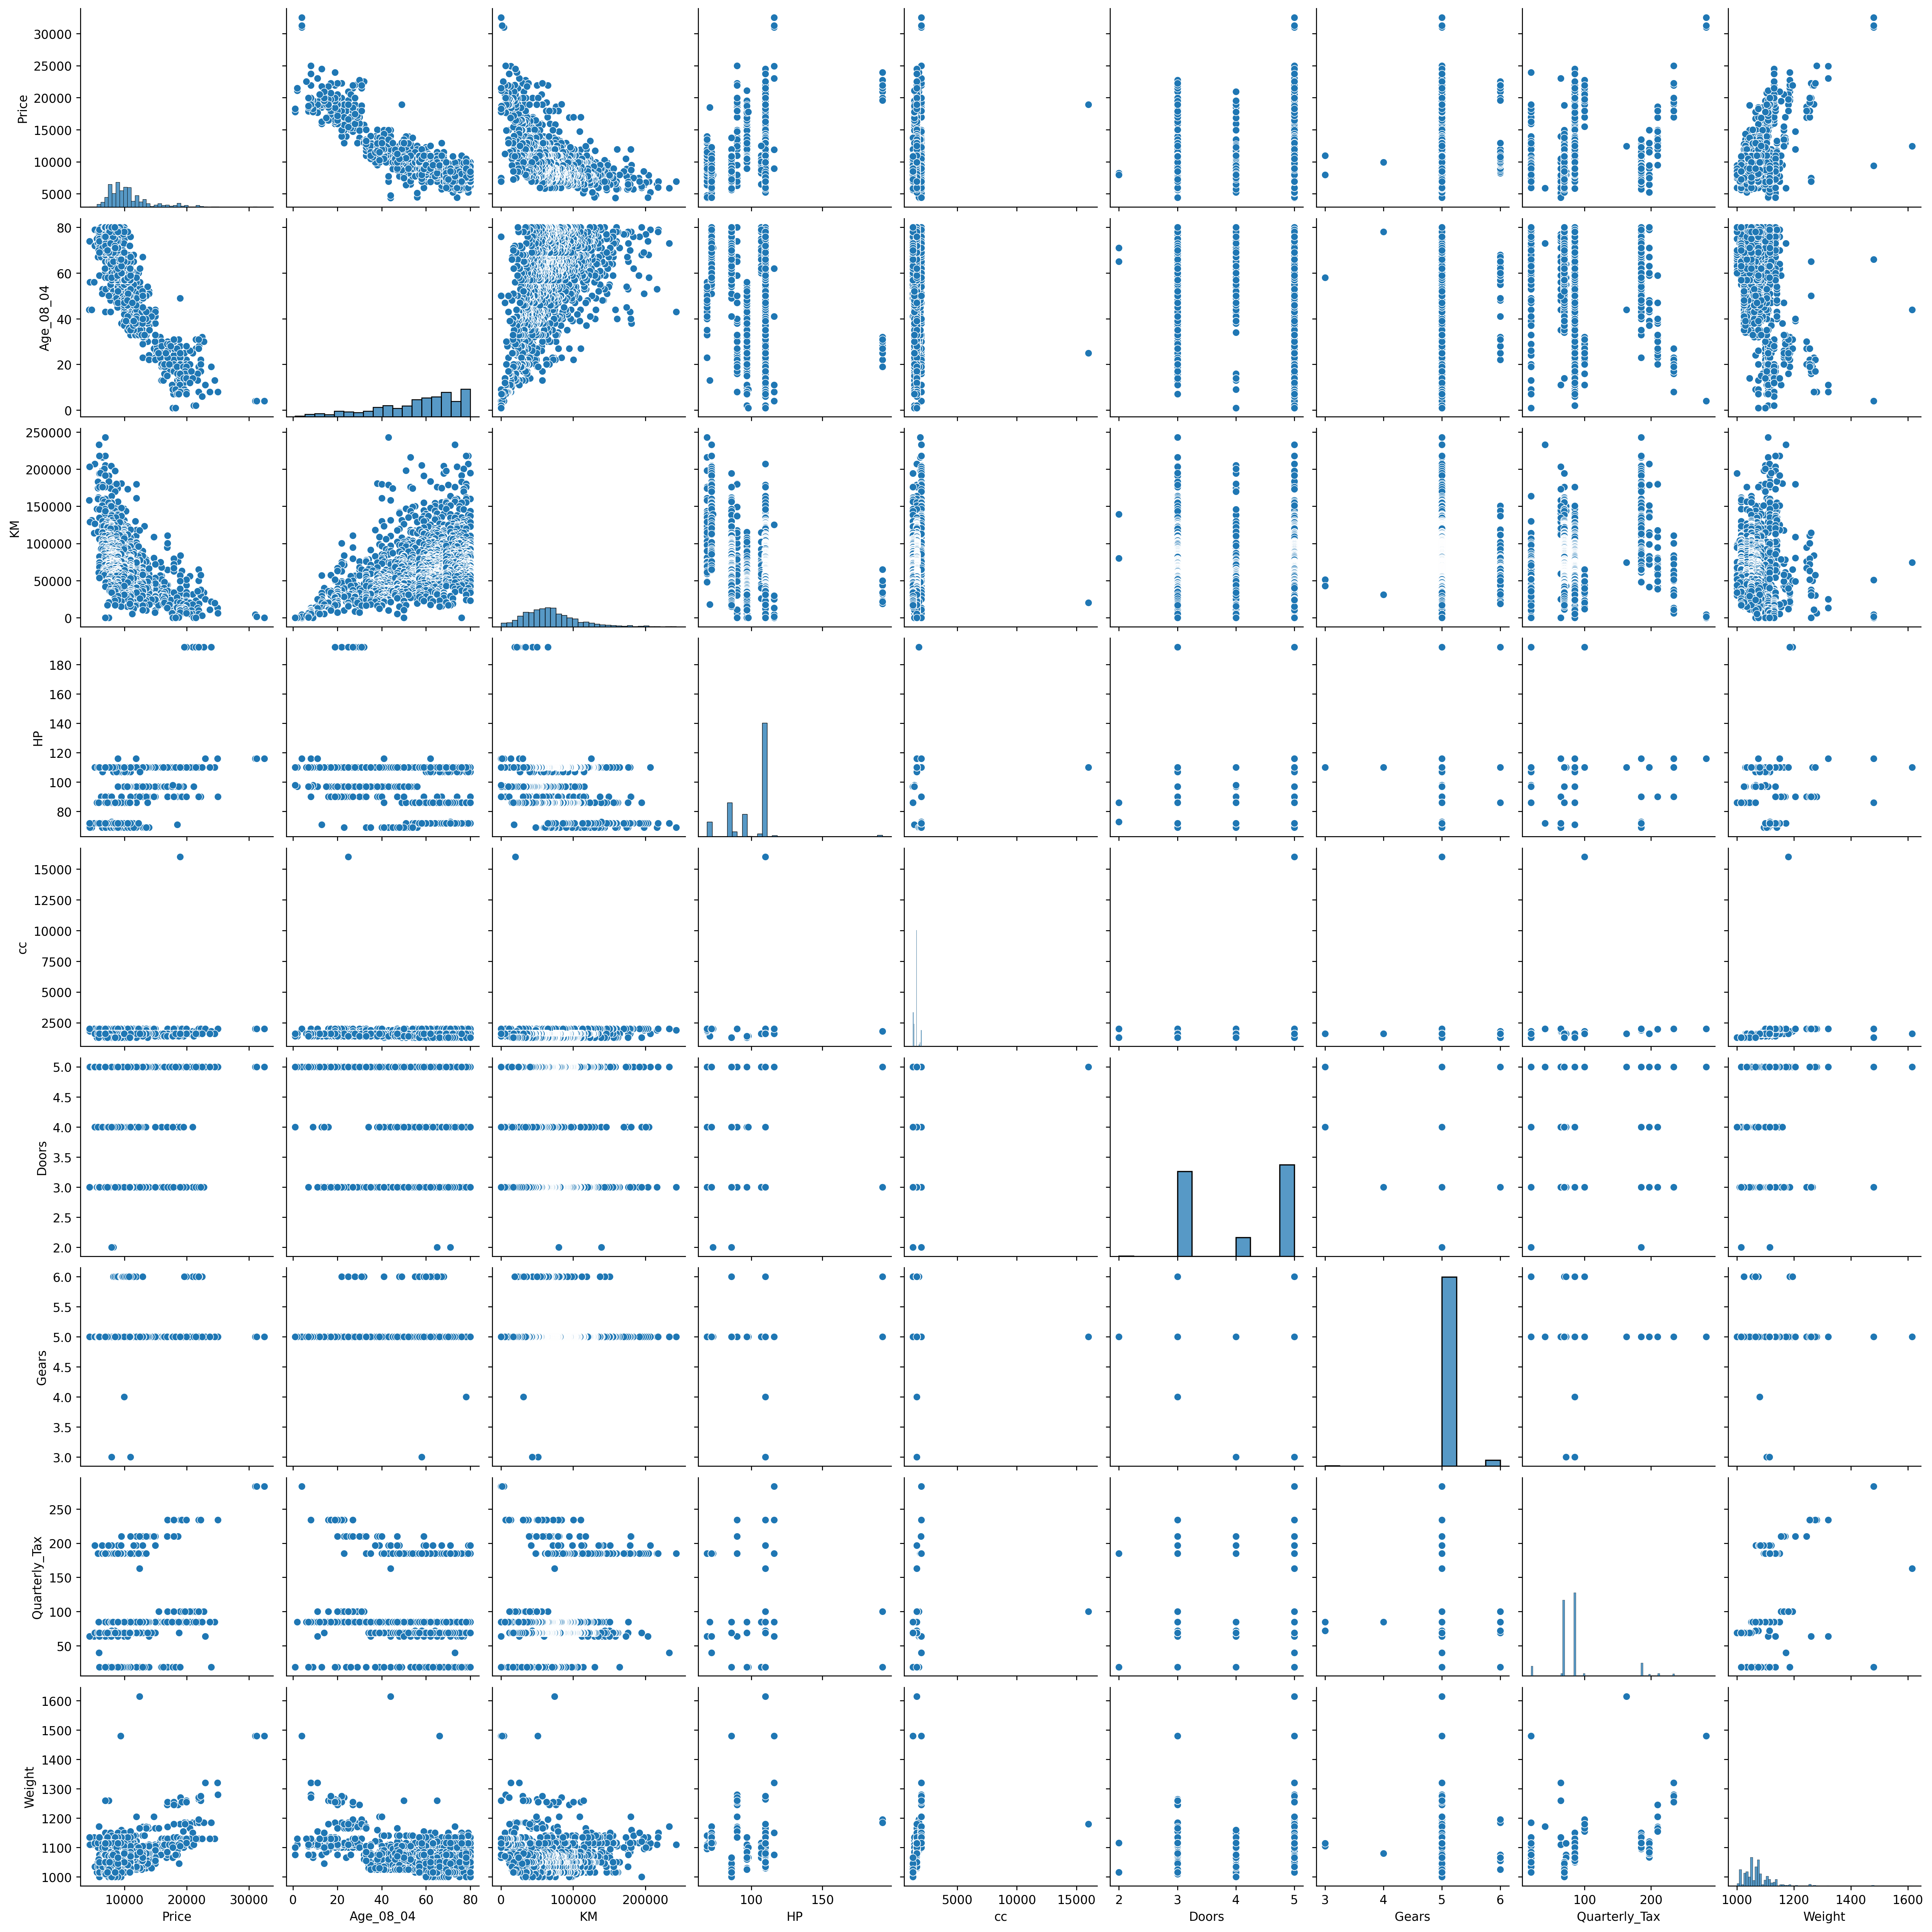

In [44]:
sns.pairplot(df)

<AxesSubplot:>

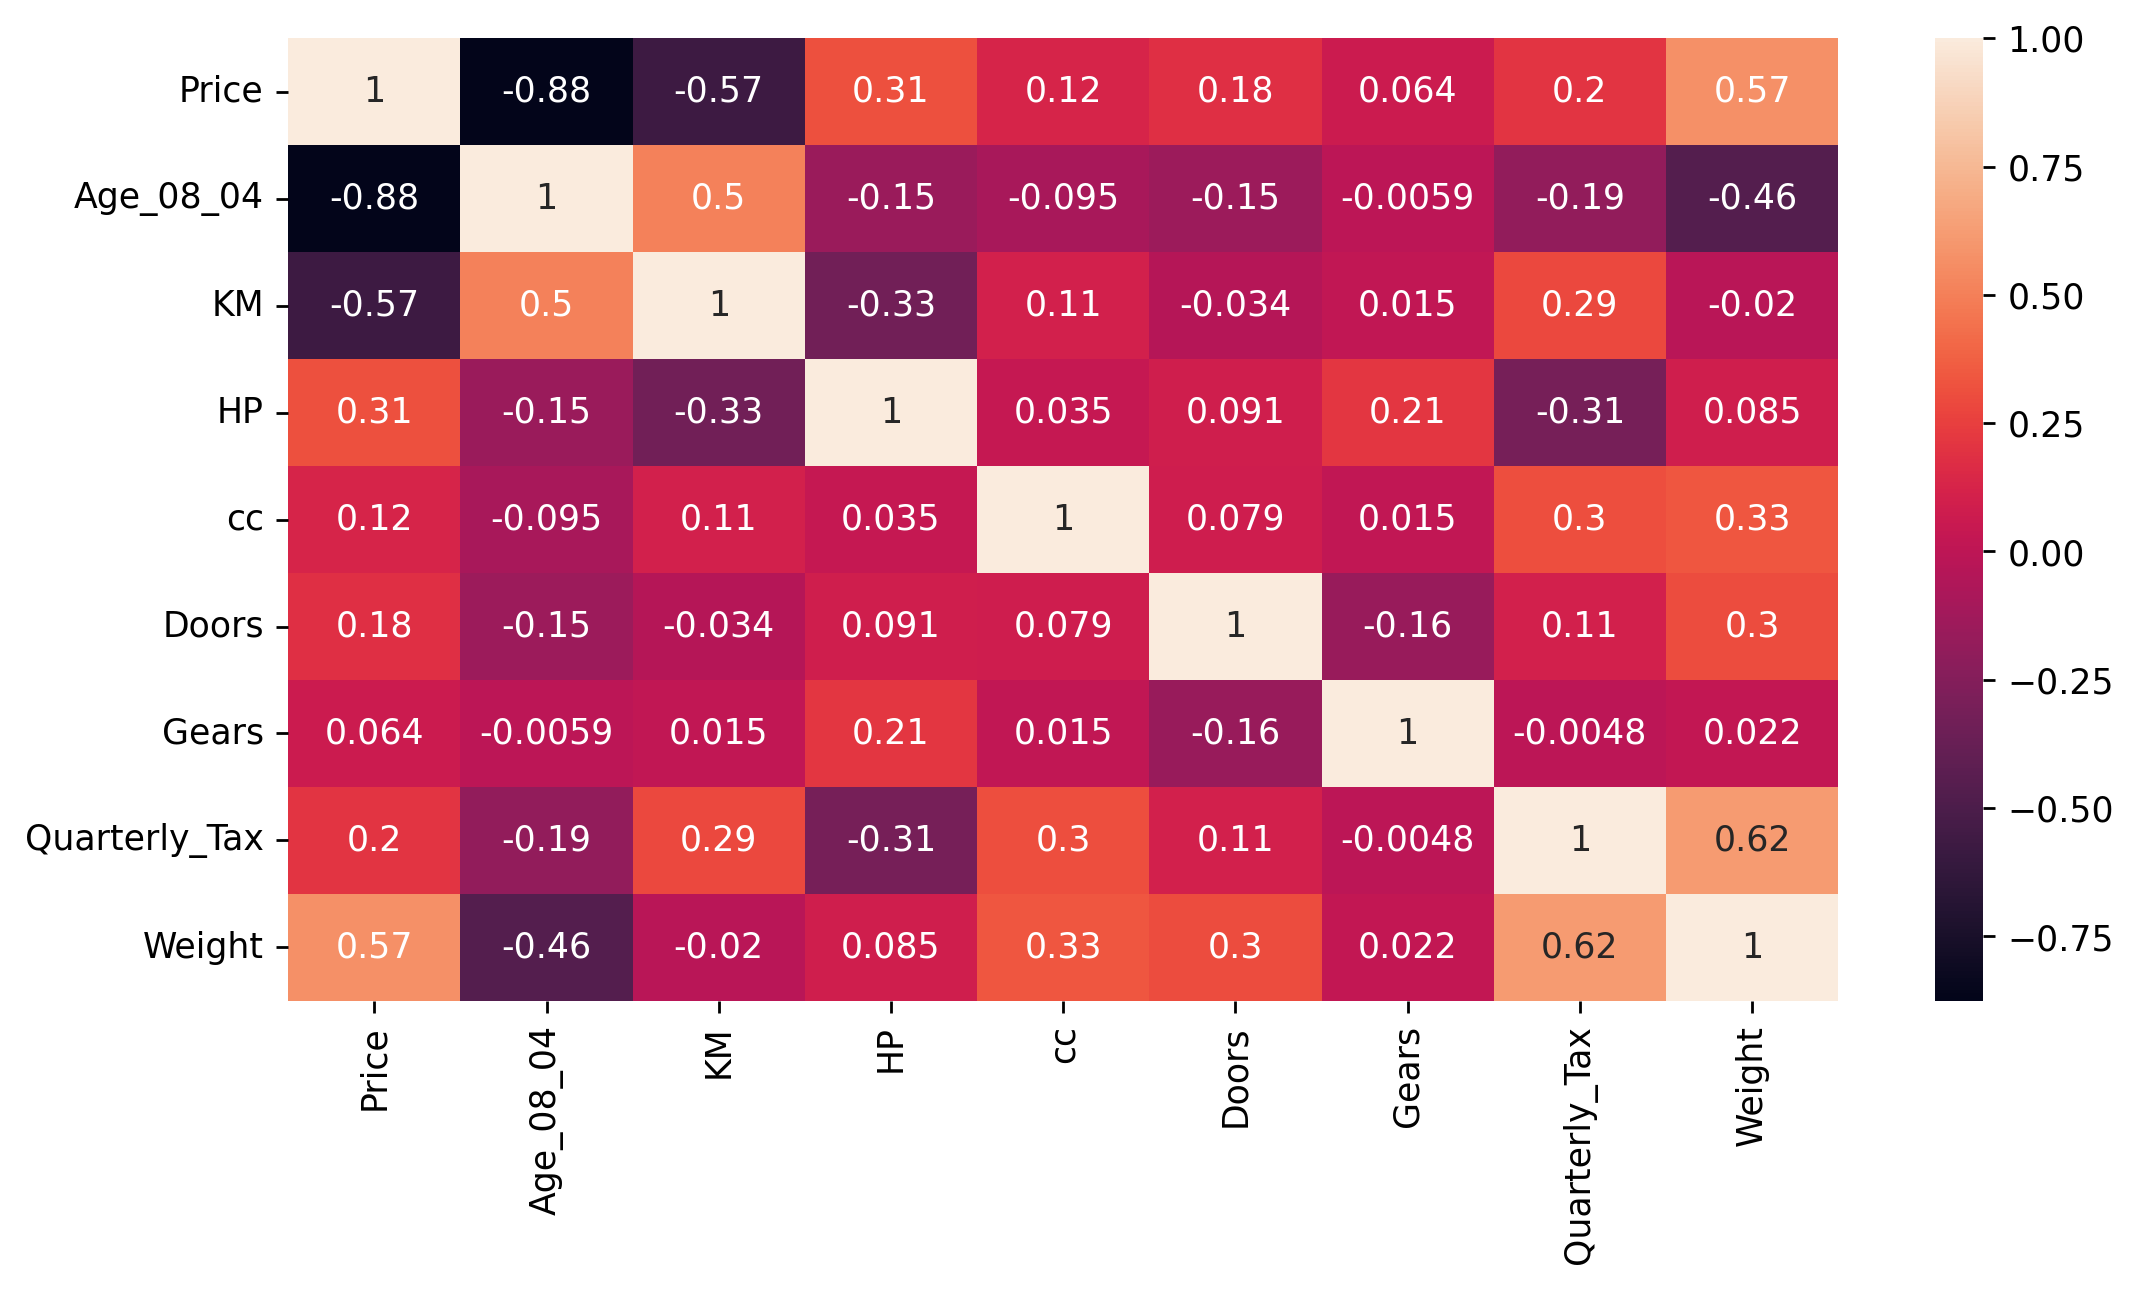

In [45]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [47]:
## Price	Age_08_04	KM	HP	cc	Doors	Gears	Quarterly_Tax	Weight
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [51]:
model.tvalues,  np.round(model.pvalues,5)

(Intercept        -3.863295
 Age_08_04       -46.540520
 KM              -16.509883
 HP               11.182607
 cc               -1.309267
 Doors            -0.022308
 Gears             3.039820
 Quarterly_Tax     2.896934
 Weight           15.740172
 dtype: float64,
 Intercept        0.00012
 Age_08_04        0.00000
 KM               0.00000
 HP               0.00000
 cc               0.19066
 Doors            0.98221
 Gears            0.00241
 Quarterly_Tax    0.00383
 Weight           0.00000
 dtype: float64)

In [49]:
R2=model.rsquared

In [50]:
R2

0.8614412774722779

In [52]:
model.rsquared_adj

0.8606634039422978

In [53]:
## Model Accuracy is 86%

In [54]:
## Columns 'cc' & 'Doors' have no significant values

## Slr model for insignificant columns

In [59]:
slr_c=smf.ols('Price~cc',data=df).fit()
slr_c.tvalues , np.round(slr_c.pvalues,8)

(Intercept    25.022546
 cc            4.672709
 dtype: float64,
 Intercept    0.000000
 cc           0.000003
 dtype: float64)

In [60]:
## CC has significant value

In [68]:
slr_d=smf.ols('Price~Doors',data=df).fit()
slr_d.tvalues , np.round(slr_d.pvalues,12)

(Intercept    19.548721
 Doors         7.004137
 dtype: float64,
 Intercept    0.000000e+00
 Doors        4.000000e-12
 dtype: float64)

In [69]:
## Doors has significant value

## MLR model for insignificant columns

In [72]:
mlr_cd=smf.ols('Price~cc+Doors',data=df).fit()
mlr_cd.tvalues, np.round(mlr_cd.pvalues,10)

(Intercept    12.919014
 cc            4.202885
 Doors         6.692620
 dtype: float64,
 Intercept    0.000000
 cc           0.000028
 Doors        0.000000
 dtype: float64)

In [73]:
## CC & Doors have significant values

# Model Validation Technique

## Two technique : 1) Colinearity Check                                              2) Residual Analysis

###  For  colinearity

In [75]:
# Calculation of vif

In [82]:
r2_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_age=1/(1-r2_age)

r2_km=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_km=1/(1-r2_km)

r2_hp=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_hp=1/(1-r2_hp)

r2_cc=smf.ols('cc~KM+Age_08_04+HP+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-r2_cc)

r2_do=smf.ols('Doors~KM+Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_do=1/(1-r2_do)

r2_ge=smf.ols('Gears~KM+Age_08_04+HP+cc+Doors+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_ge=1/(1-r2_ge)

r2_qt=smf.ols('Quarterly_Tax~HP+KM+Age_08_04+cc+Doors+Gears+Weight',data=df).fit().rsquared
vif_qt=1/(1-r2_qt)

r2_we=smf.ols('Weight~Quarterly_Tax+HP+KM+Age_08_04+cc+Doors+Gears',data=df).fit().rsquared
vif_we=1/(1-r2_we)


In [83]:
VIF=pd.DataFrame({'Features':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
                   'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_do,vif_ge,vif_qt,vif_we]})

In [84]:
VIF

Features       VIF
0      Age_08_04  1.867121
1             KM  1.757284
2             HP  1.419745
3             cc  1.162825
4          Doors  1.155060
5          Gears  1.098954
6  Quarterly_Tax  2.285651
7         Weight  2.463566

In [85]:
## None of the feature has VIF>20. So no colinearity present. Consider all features in regression equation

### Residual Analysis

In [86]:
## Check for normality of residuals by using Q-Q plots

In [87]:
model.resid

0      -3283.872494
1      -2496.496583
2      -2821.390742
3      -1447.736512
4      -2441.813222
           ...     
1430   -1294.446316
1431    2552.137806
1432      44.341547
1433   -1329.442102
1434   -3446.024936
Length: 1434, dtype: float64

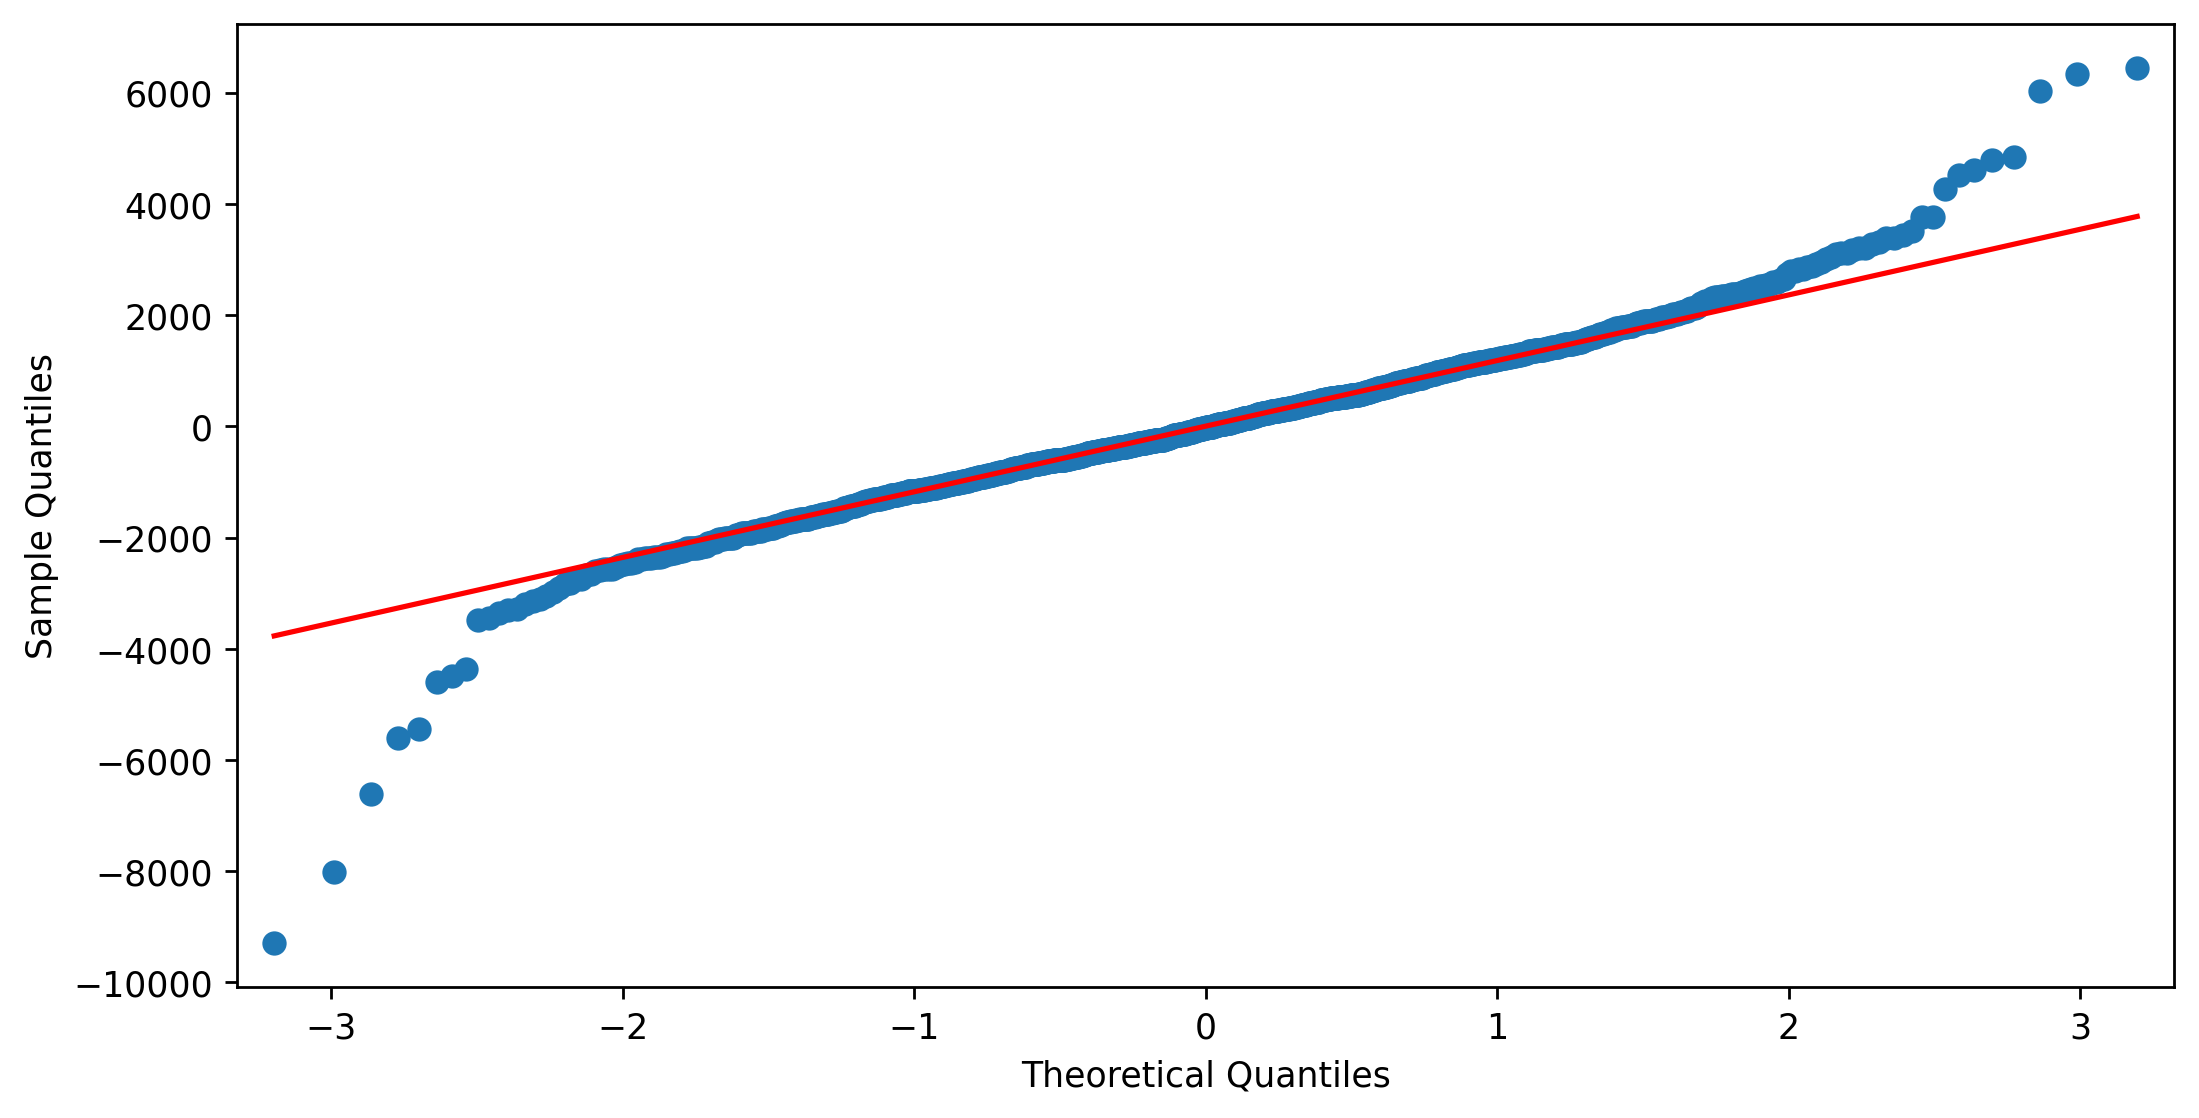

In [92]:
sm.qqplot(model.resid,line='q');

In [93]:
np.where(model.resid>6000)

(array([109, 145, 521], dtype=int64),)

In [94]:
np.where(model.resid<-6000)

(array([219, 599, 958], dtype=int64),)

### Test for Homoscadasticity or hetroscadasticity

In [103]:
##Z=(x-m)/sigma

def std_val(val):
     return (val-val.mean())/val.std()
            
    

Text(0, 0.5, 'Residual values')

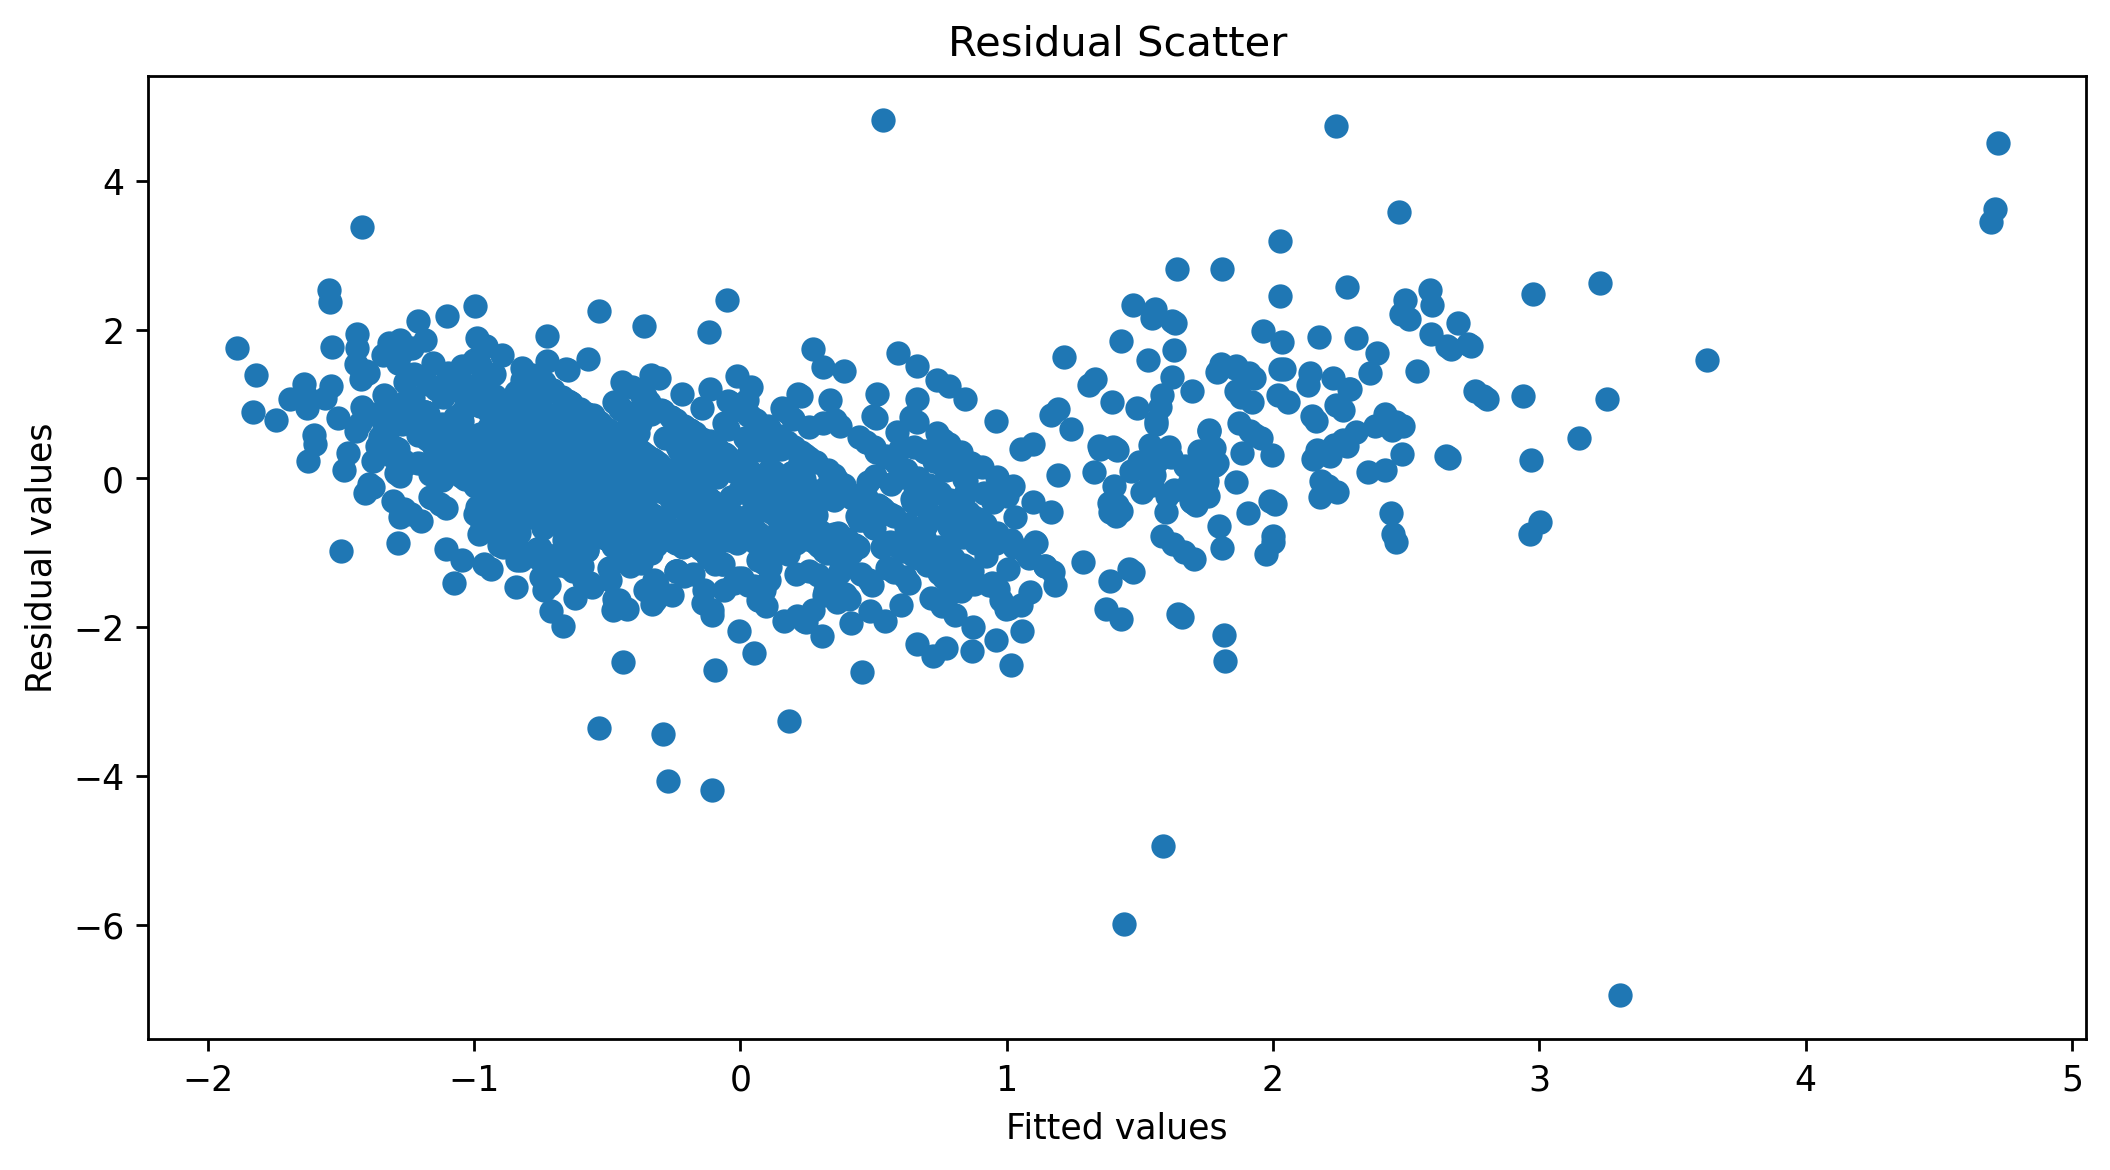

In [105]:
plt.scatter(std_val(model.fittedvalues),std_val(model.resid))
plt.title('Residual Scatter')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')

eval_env: 1


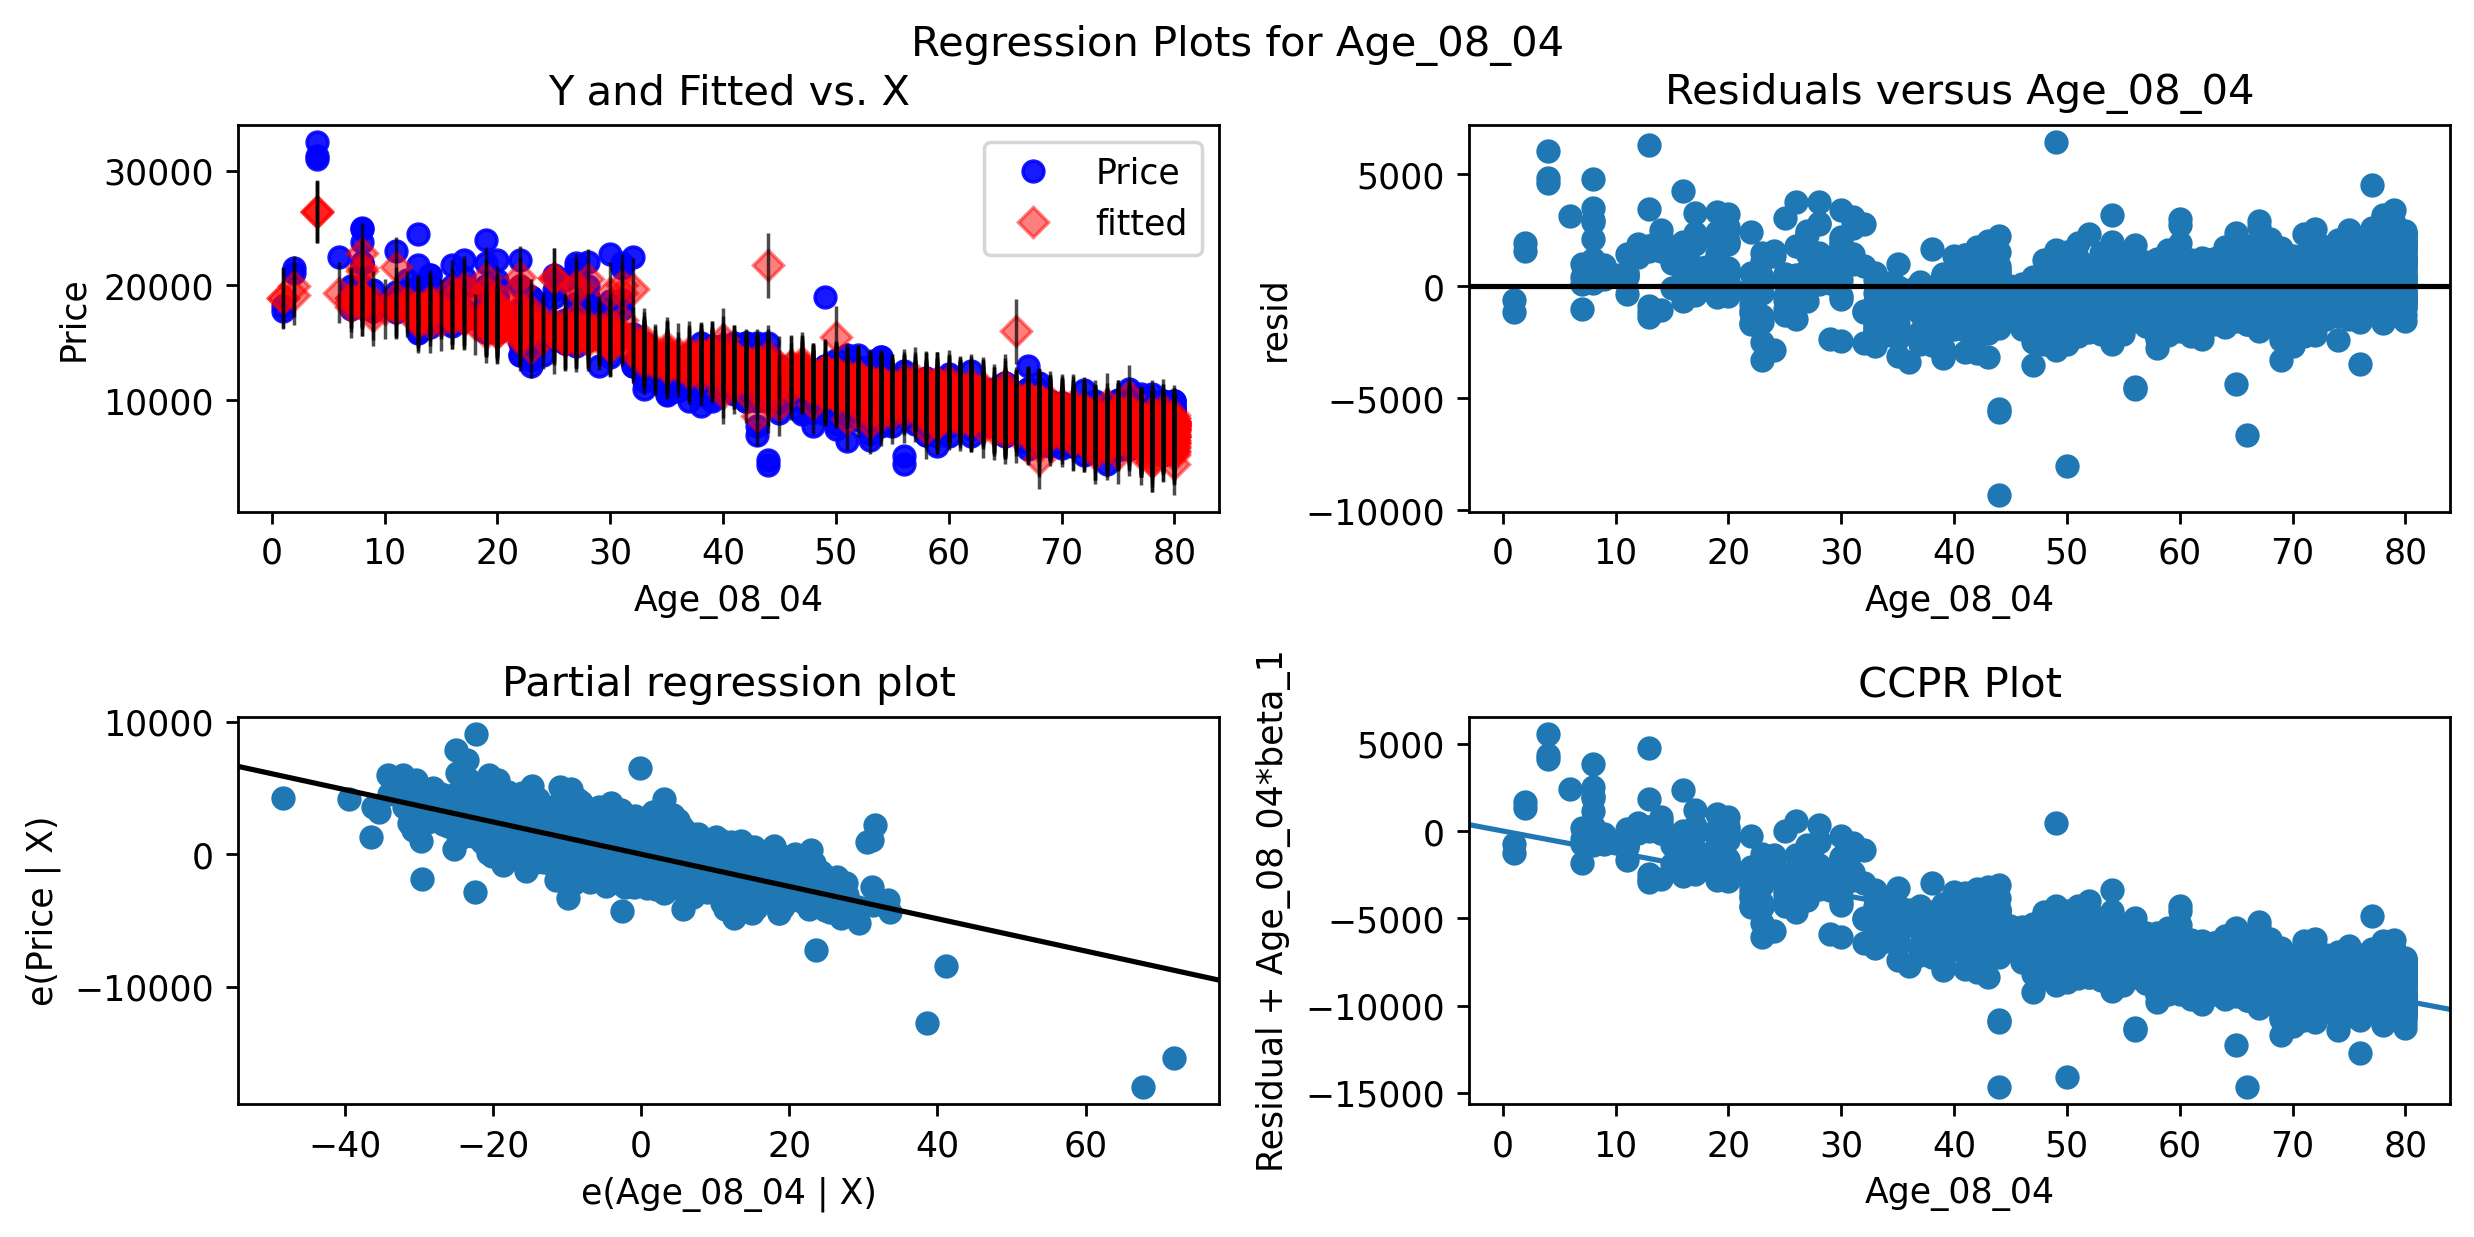

In [107]:
sm.graphics.plot_regress_exog(model,'Age_08_04');    

eval_env: 1


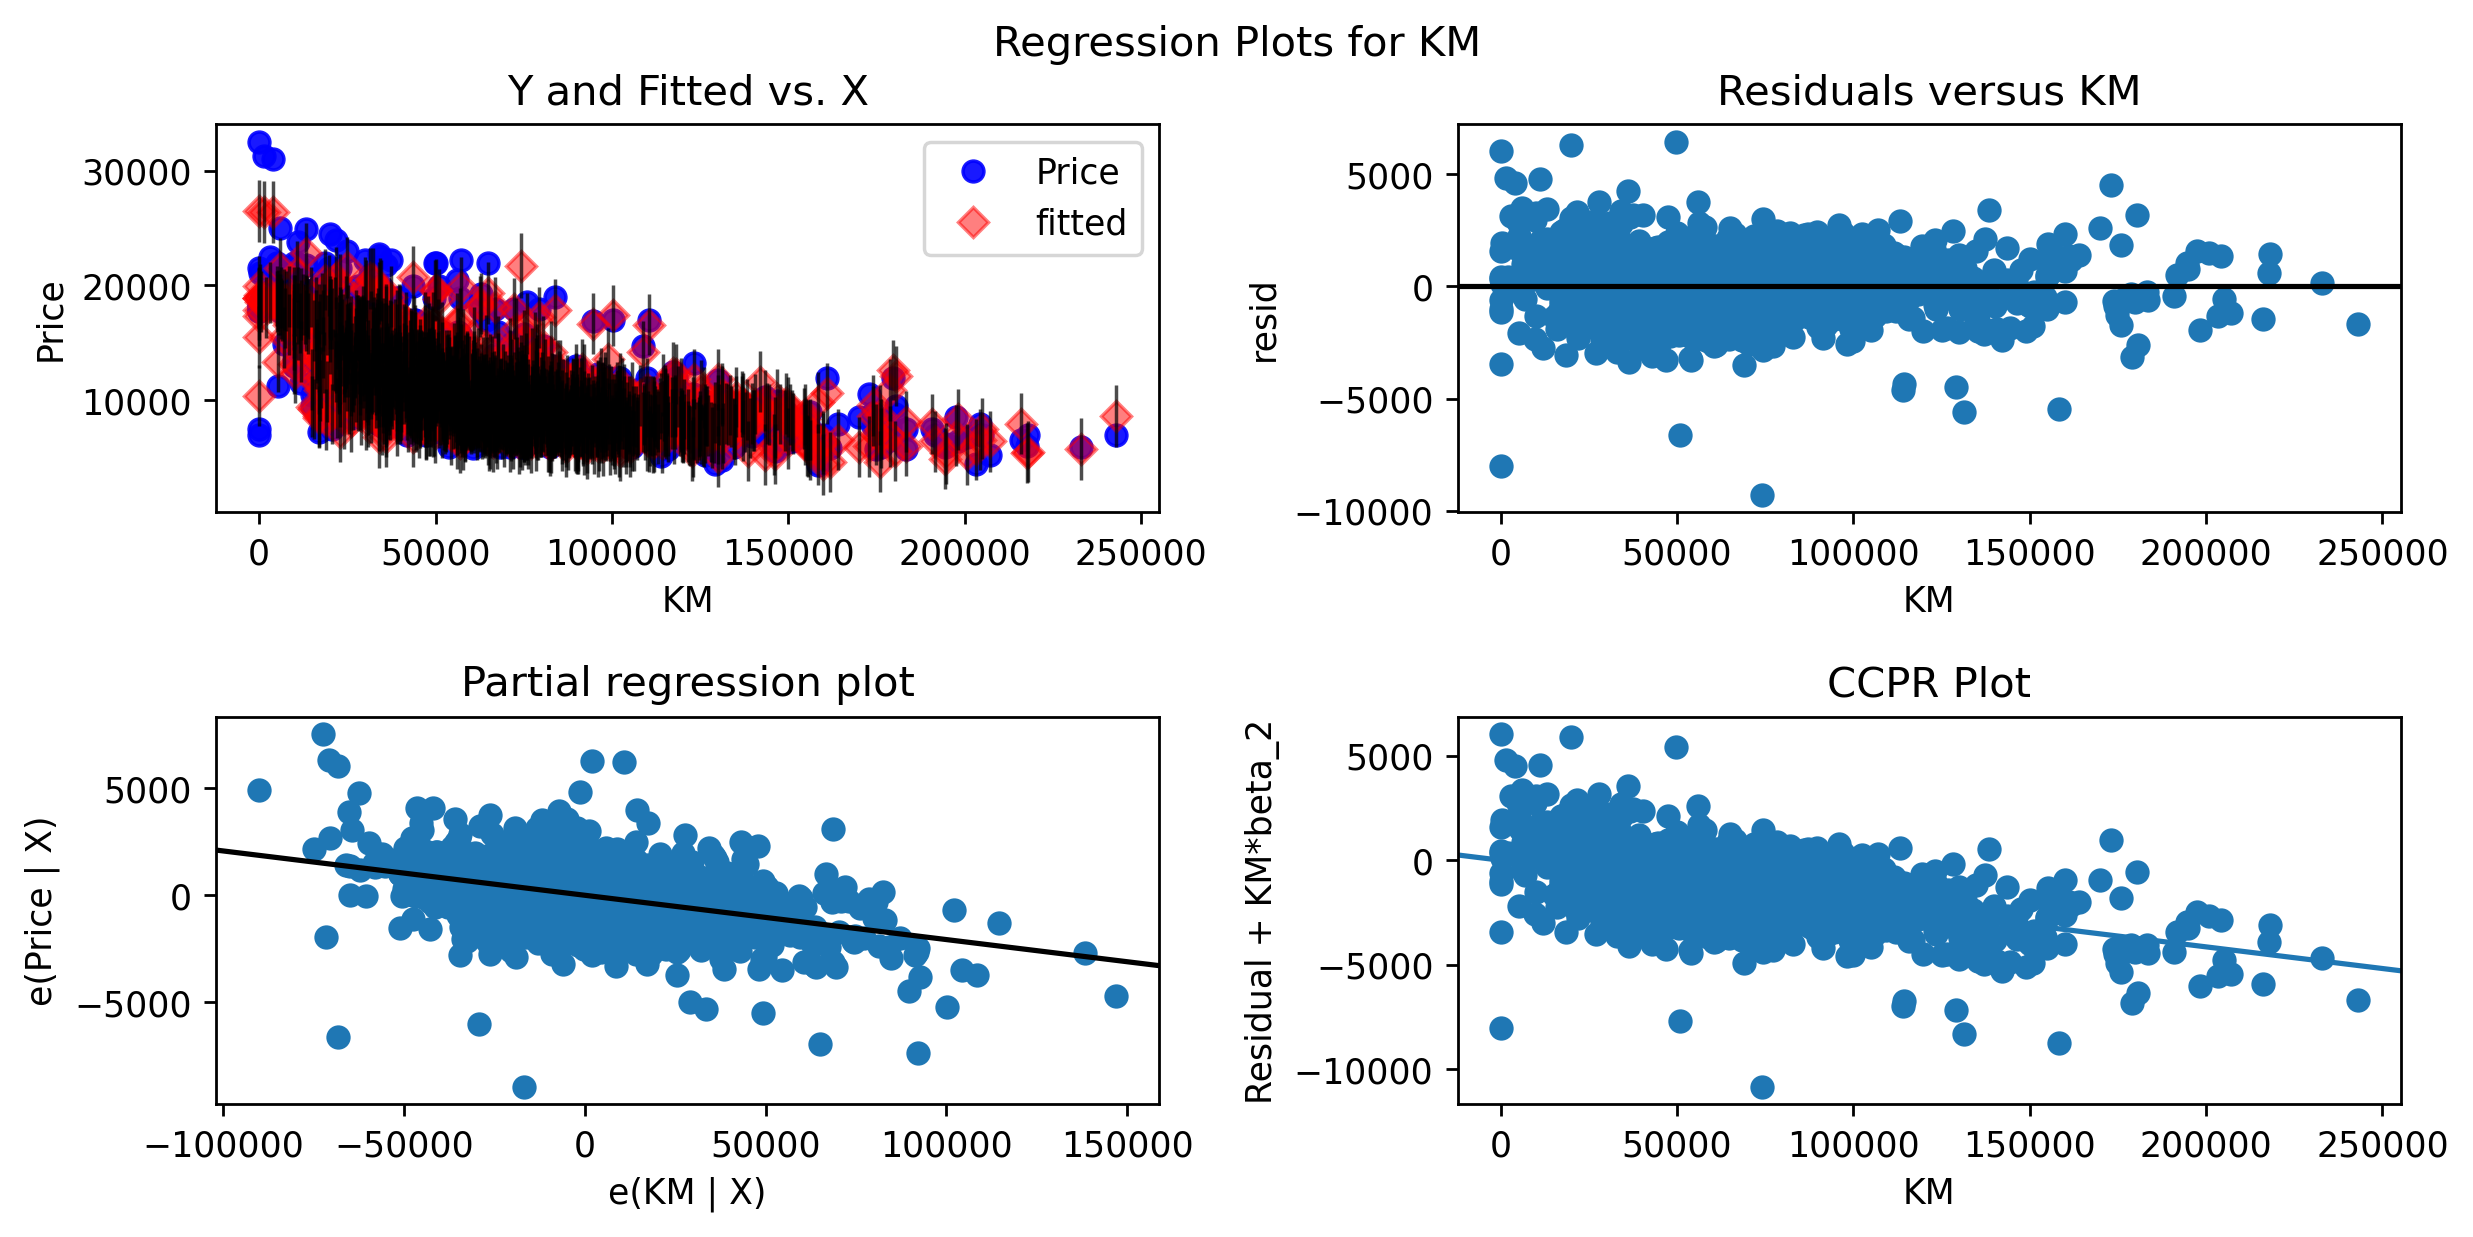

In [108]:
sm.graphics.plot_regress_exog(model,'KM');

eval_env: 1


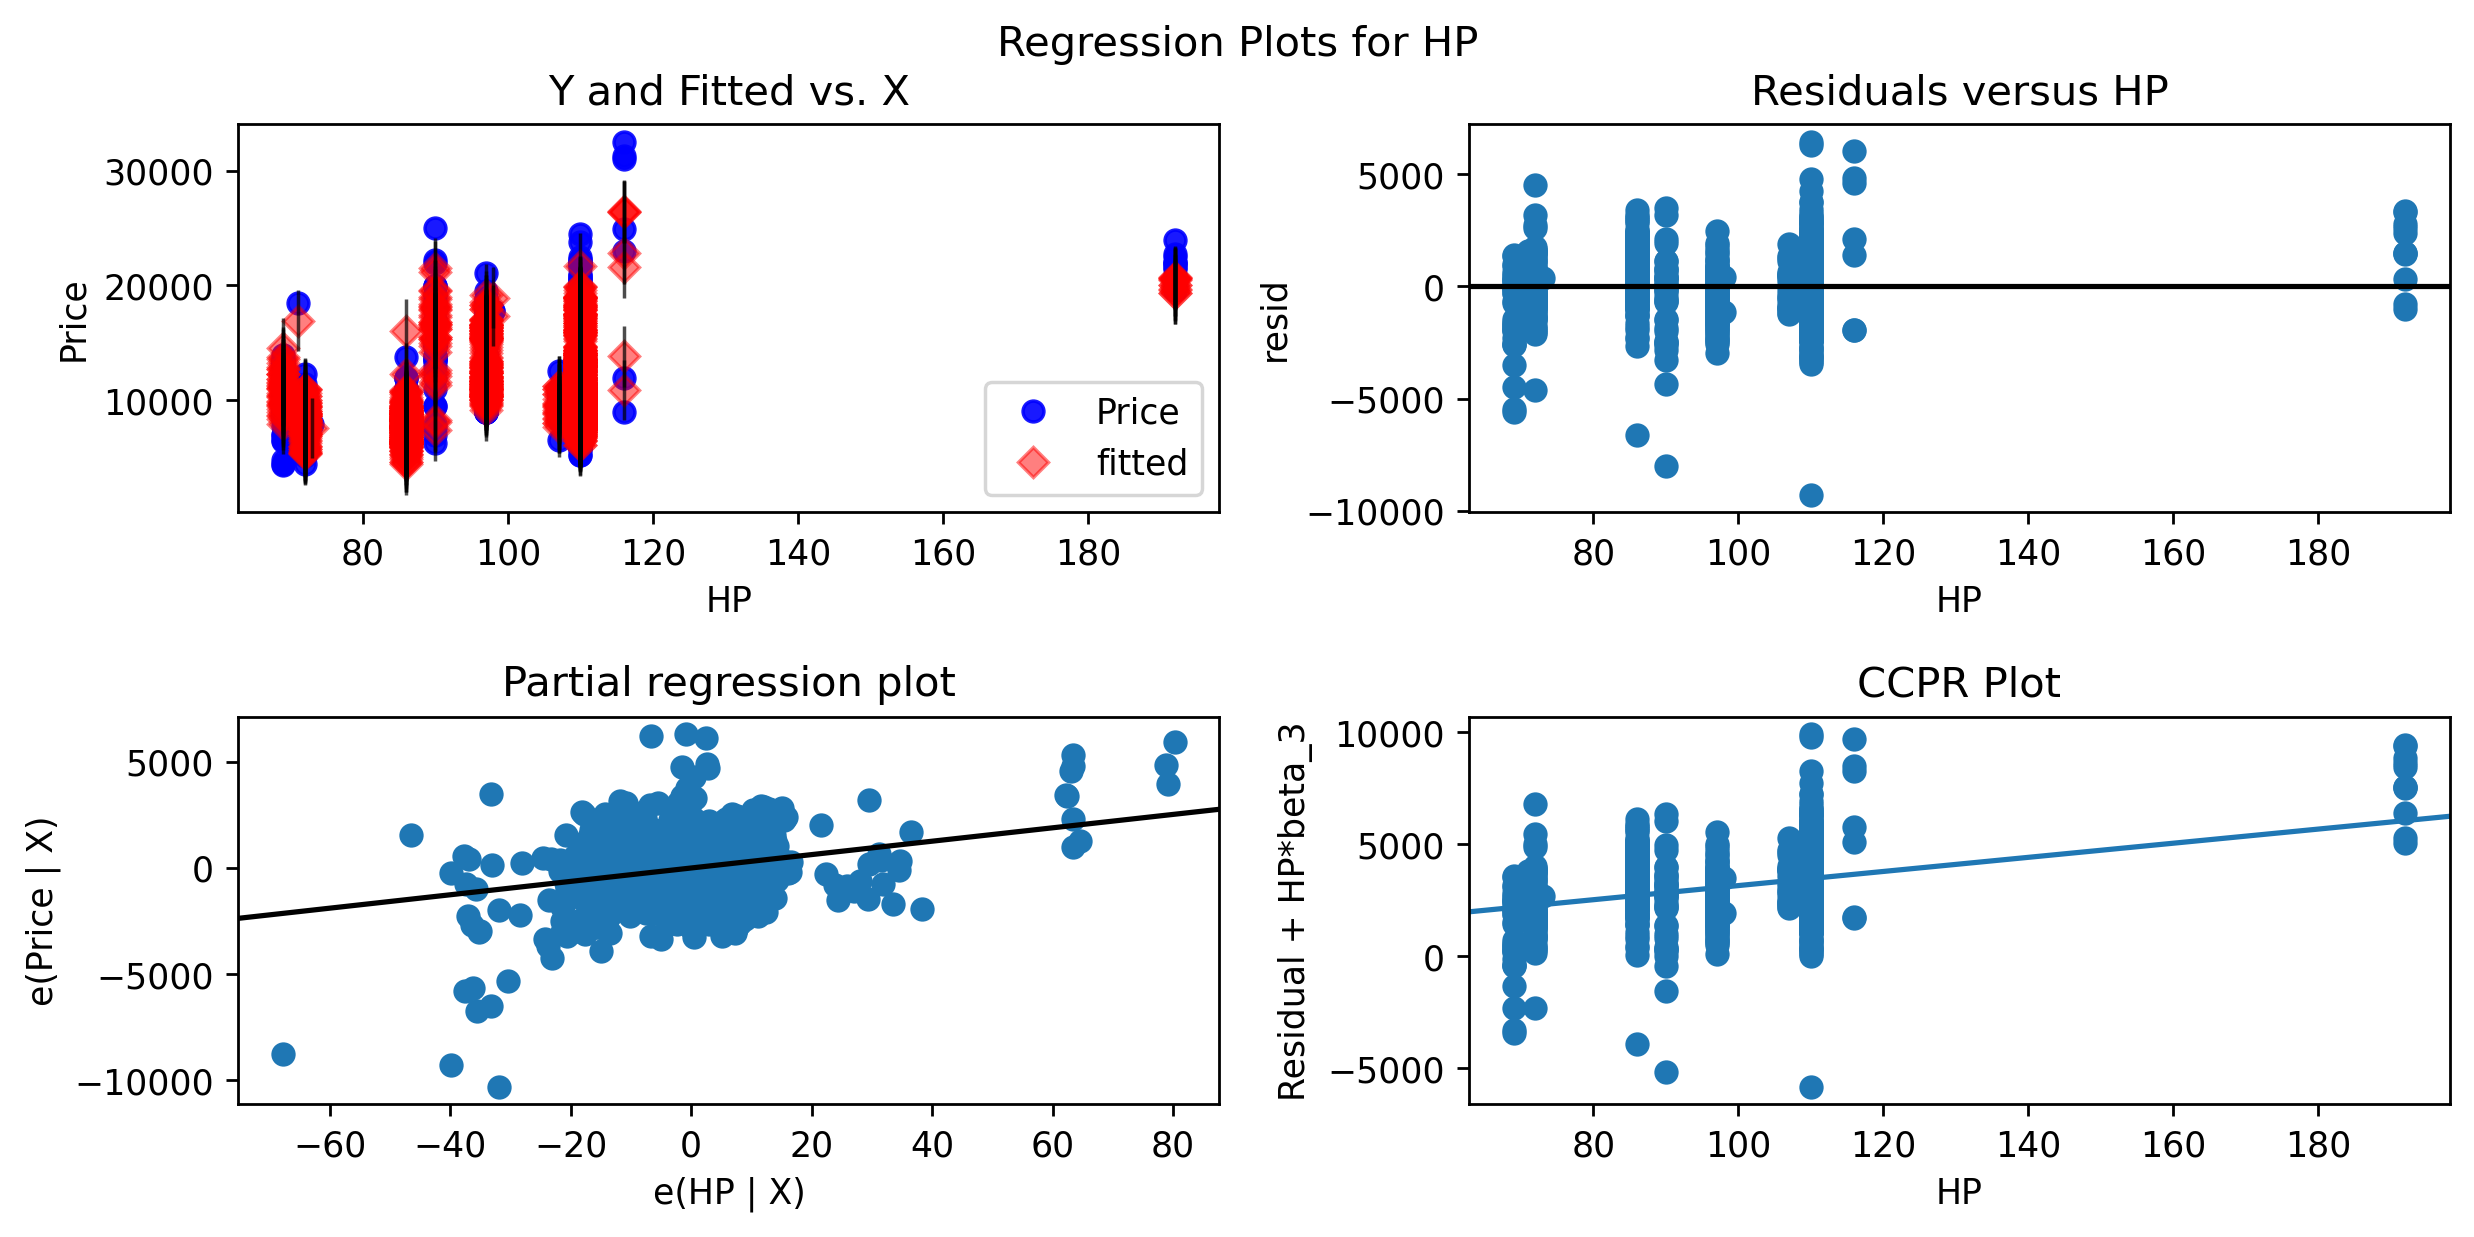

In [109]:
sm.graphics.plot_regress_exog(model,'HP');

eval_env: 1


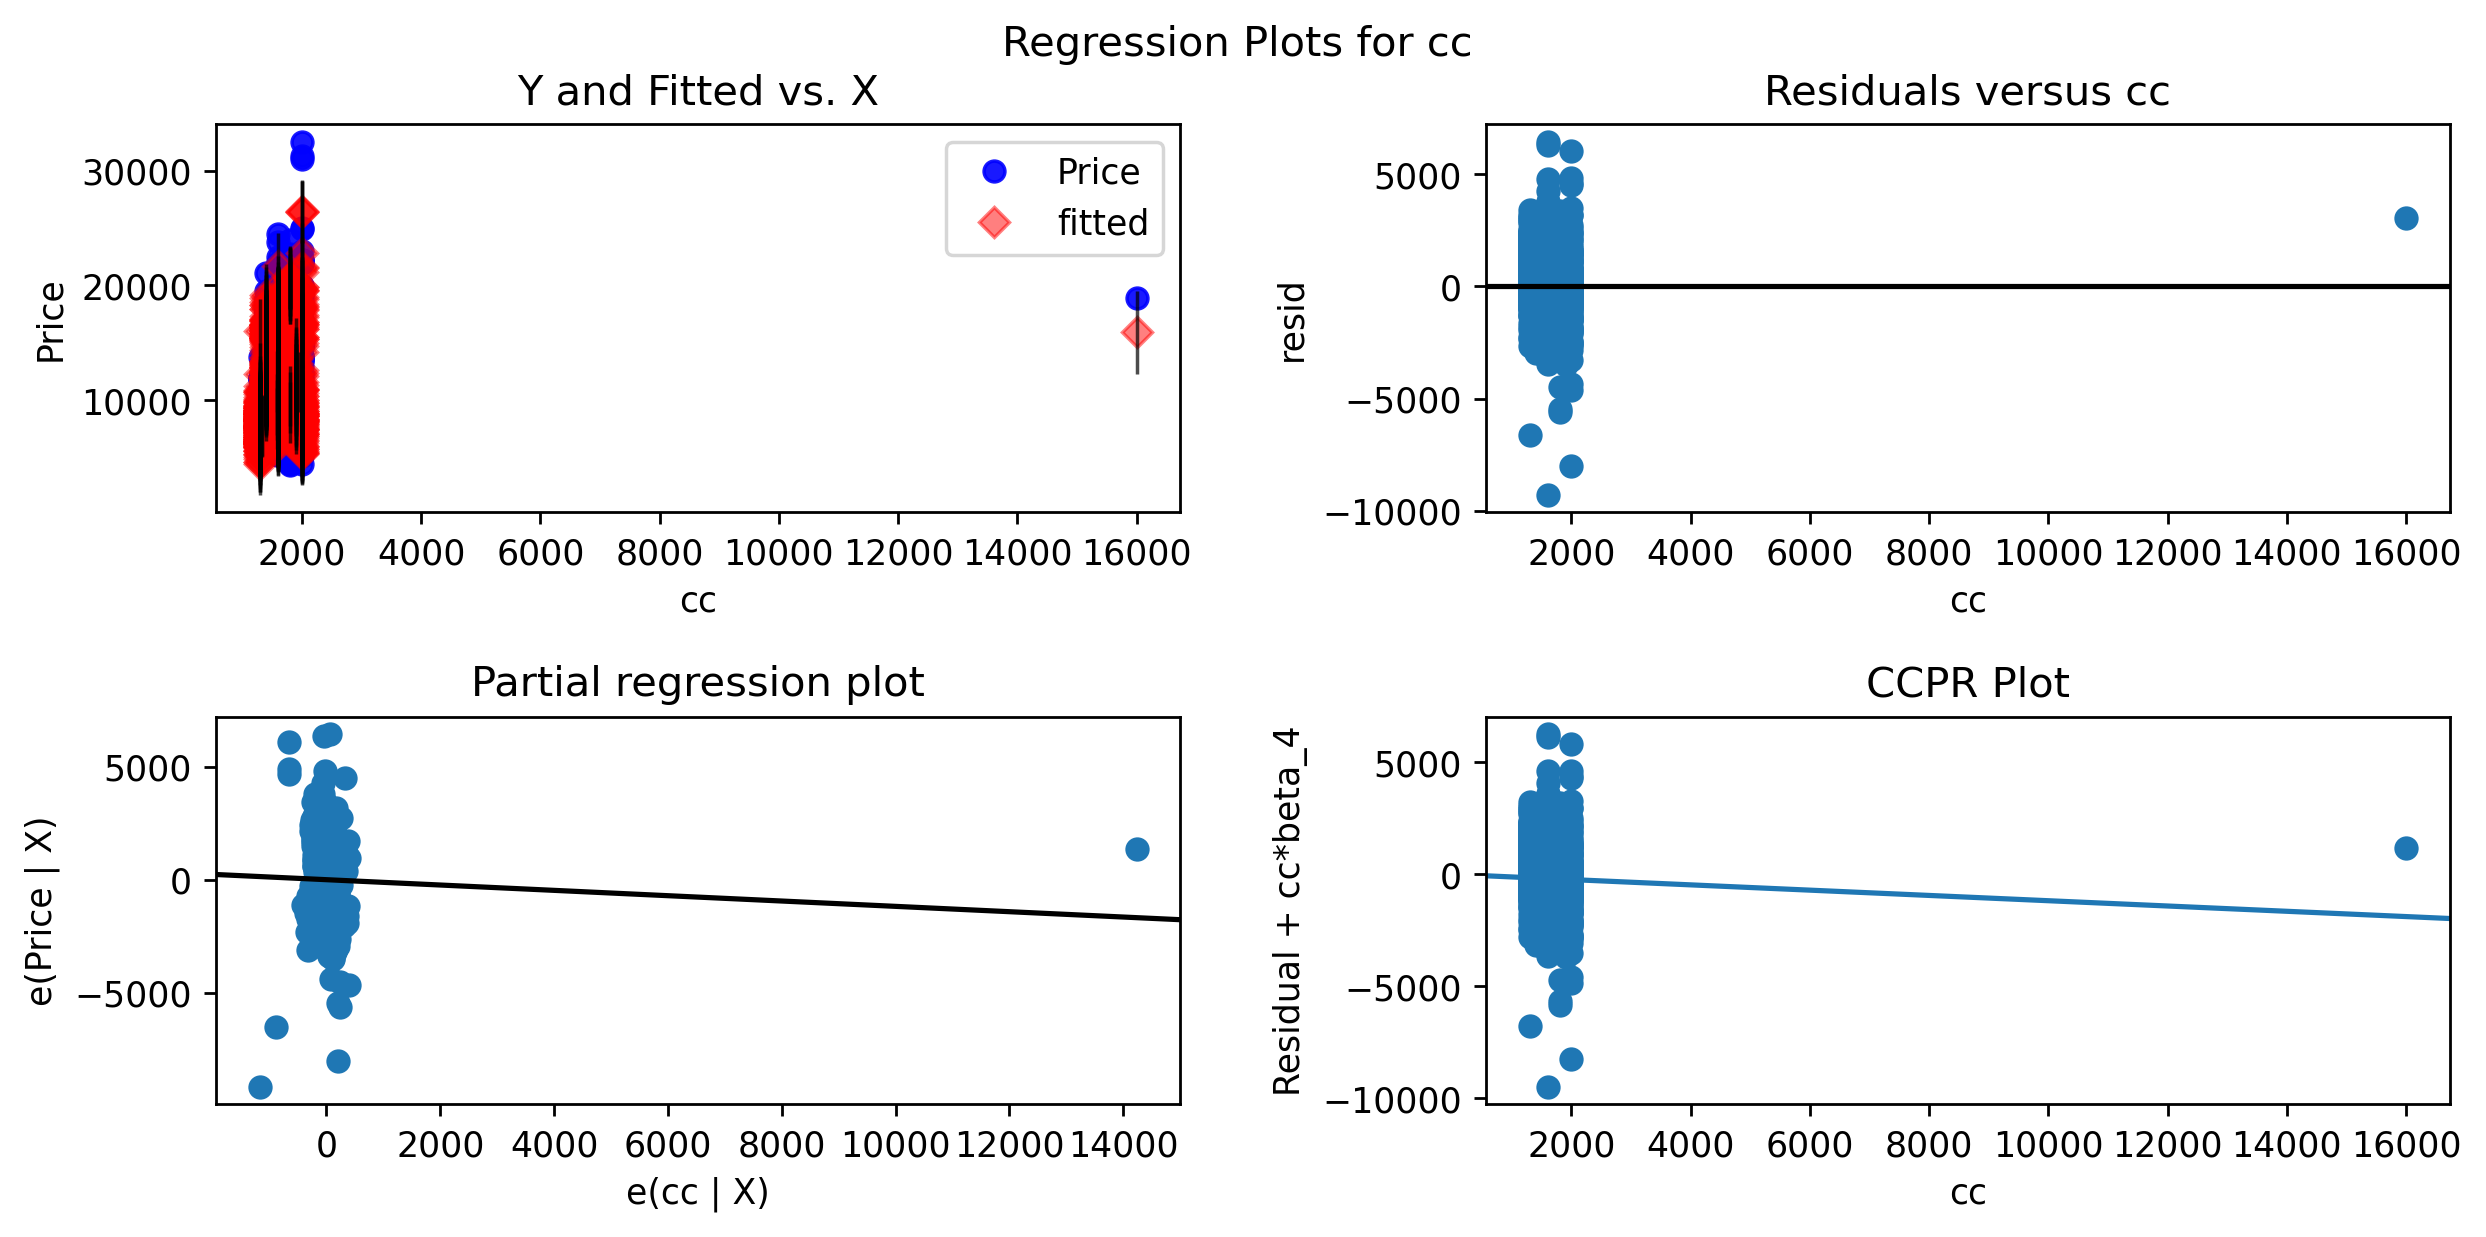

In [110]:
sm.graphics.plot_regress_exog(model,'cc');

eval_env: 1


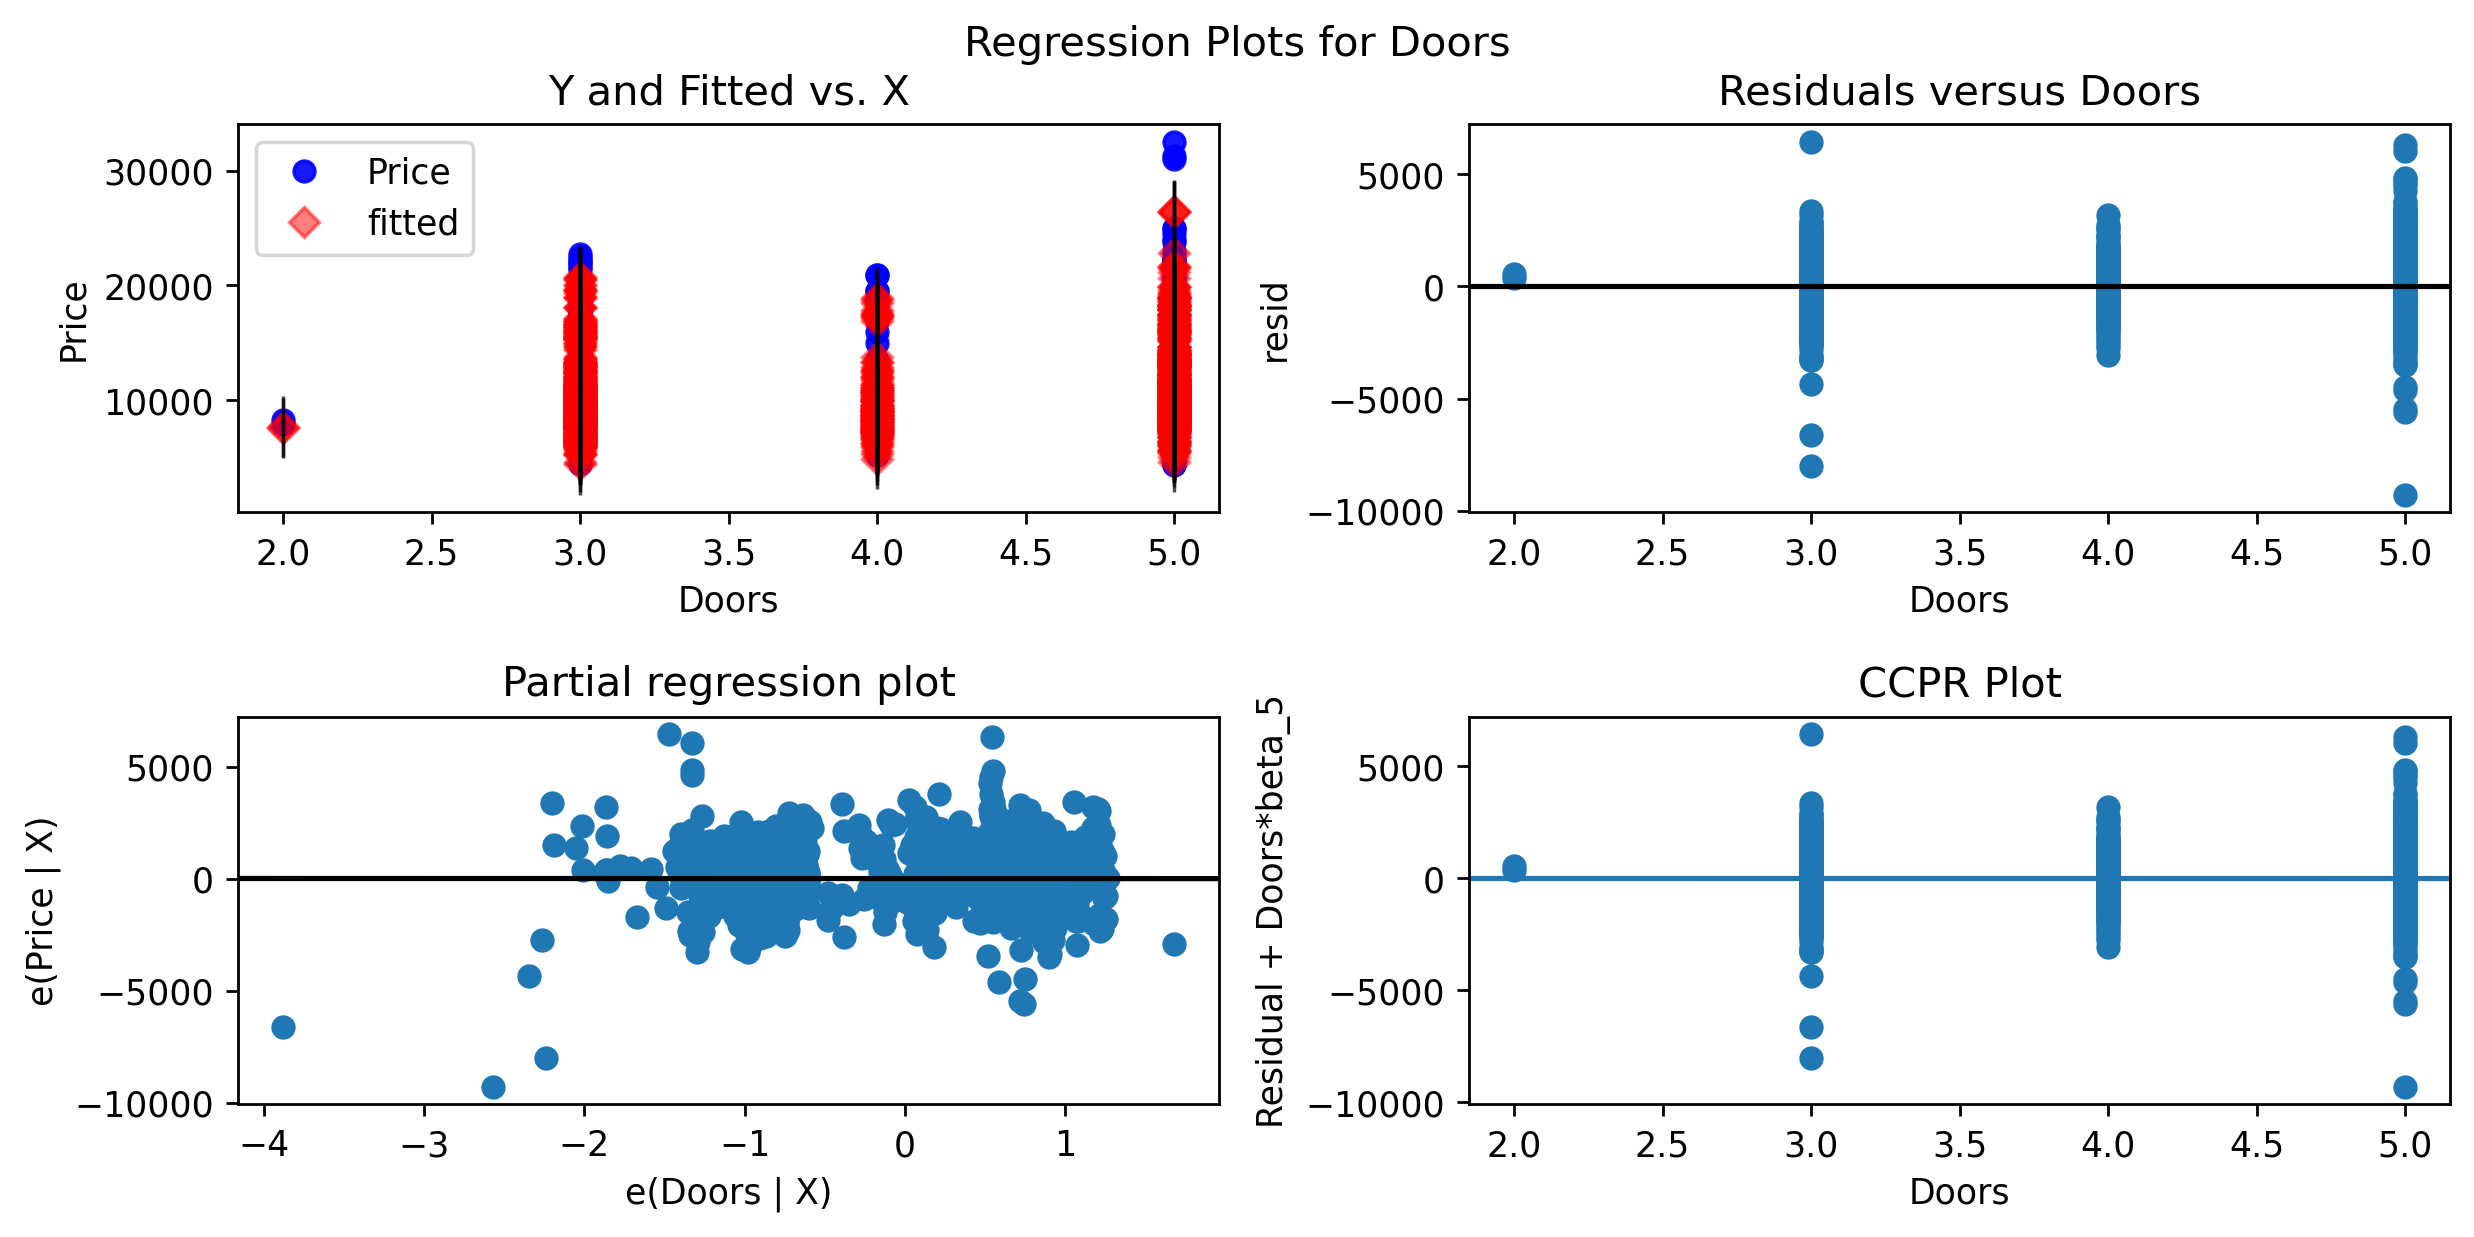

In [111]:
sm.graphics.plot_regress_exog(model,'Doors');

eval_env: 1


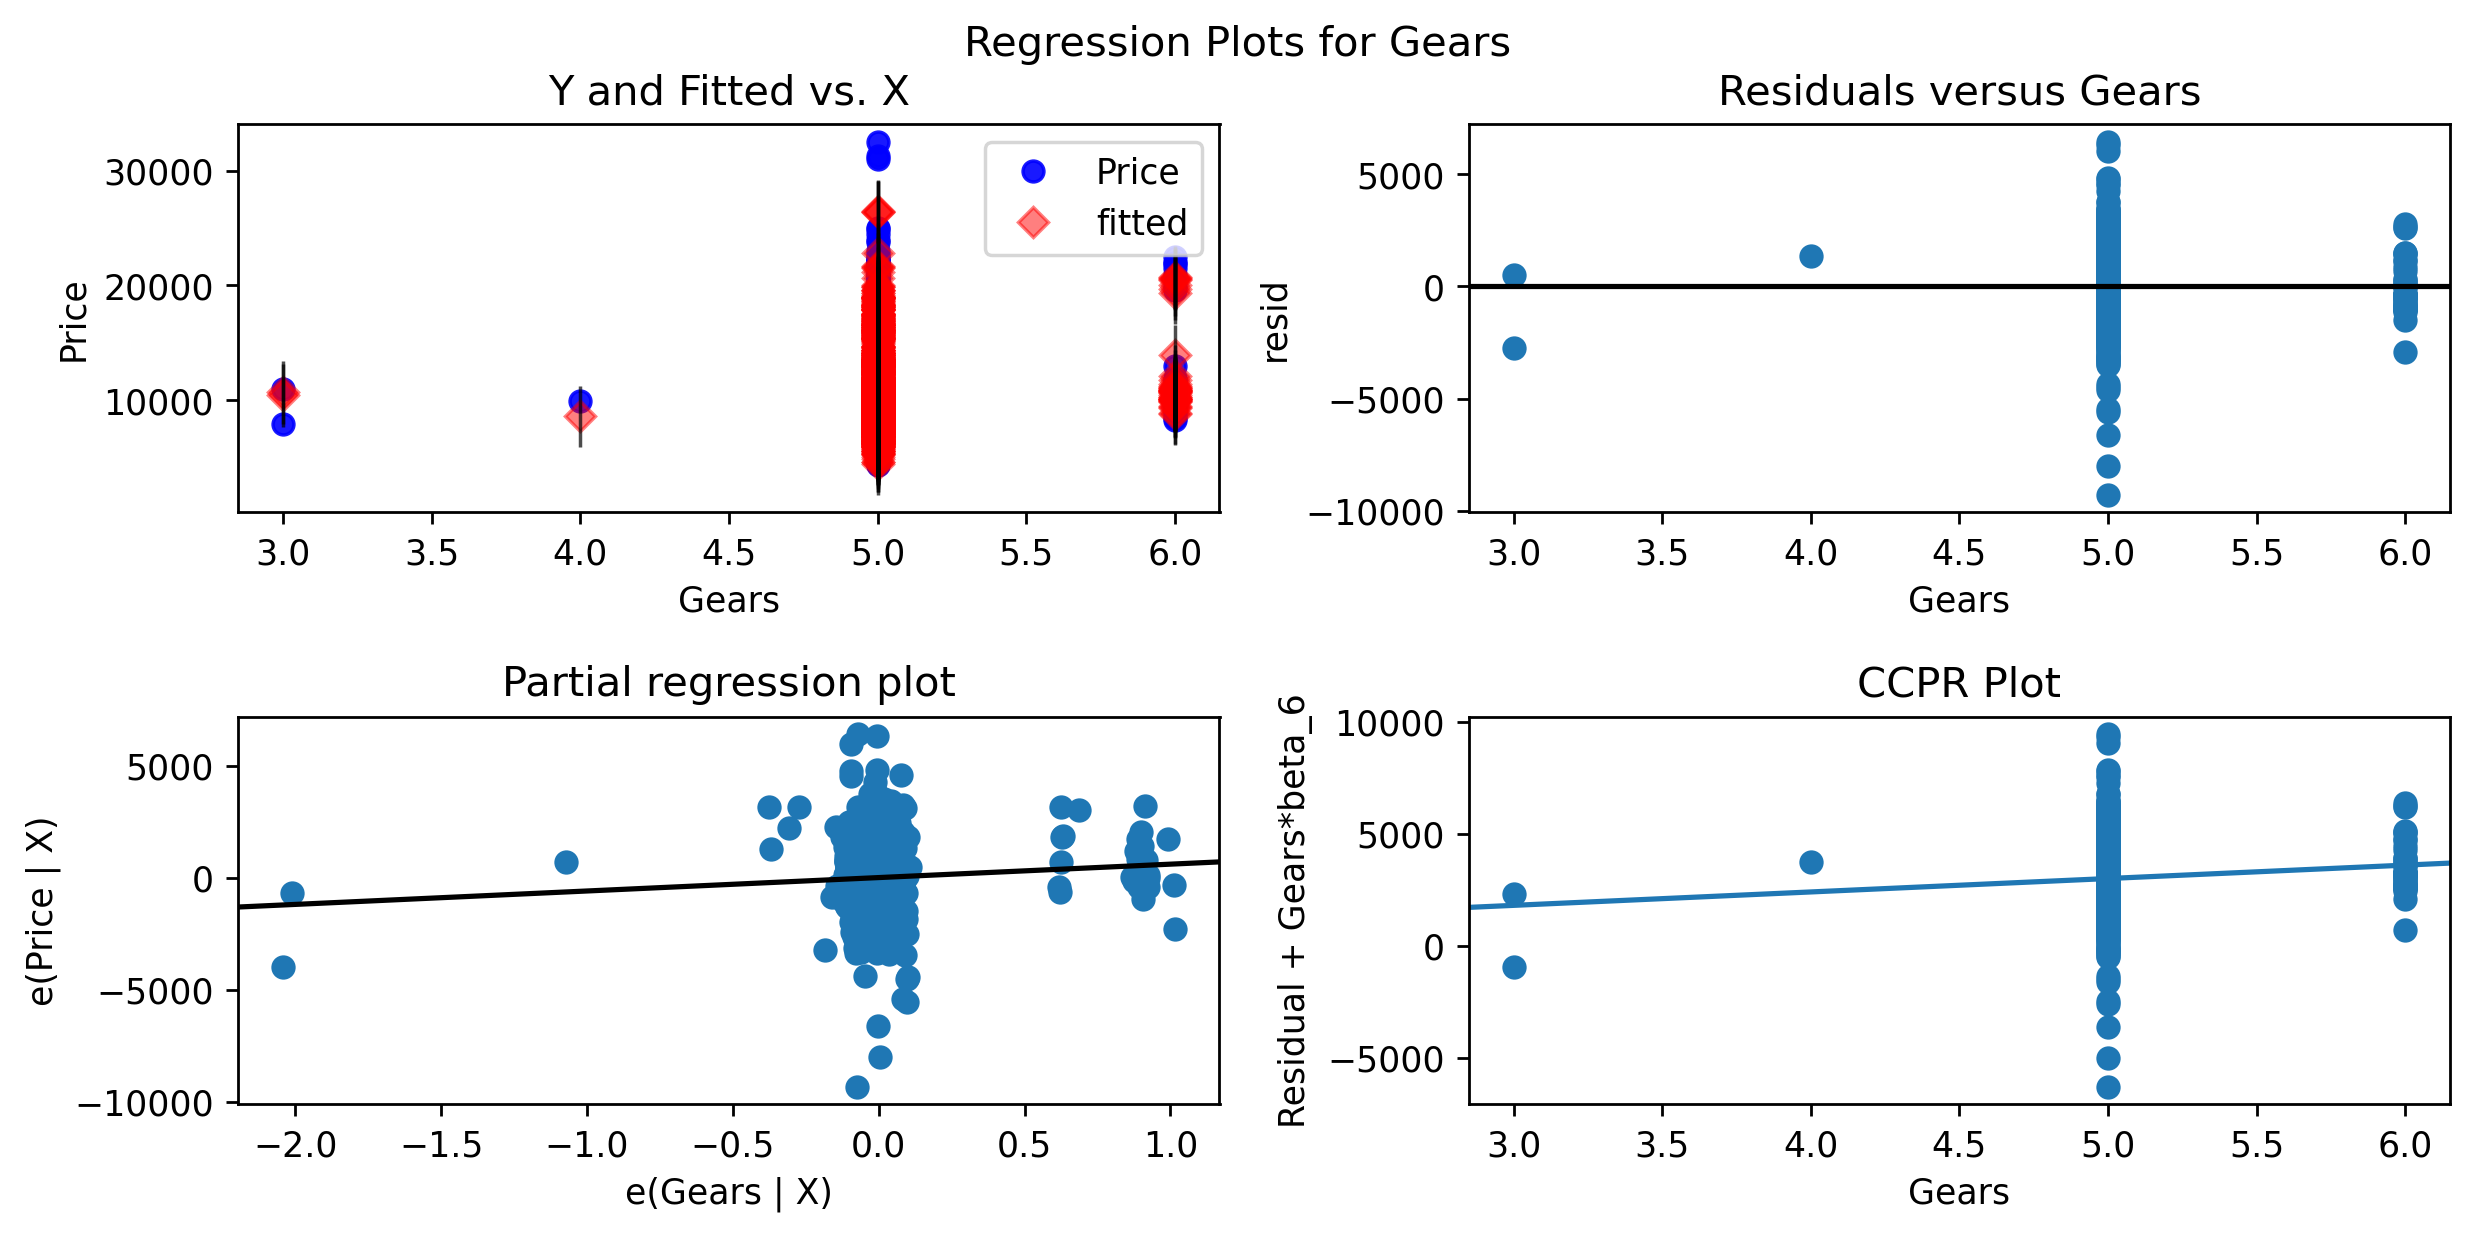

In [112]:
sm.graphics.plot_regress_exog(model,'Gears');

eval_env: 1


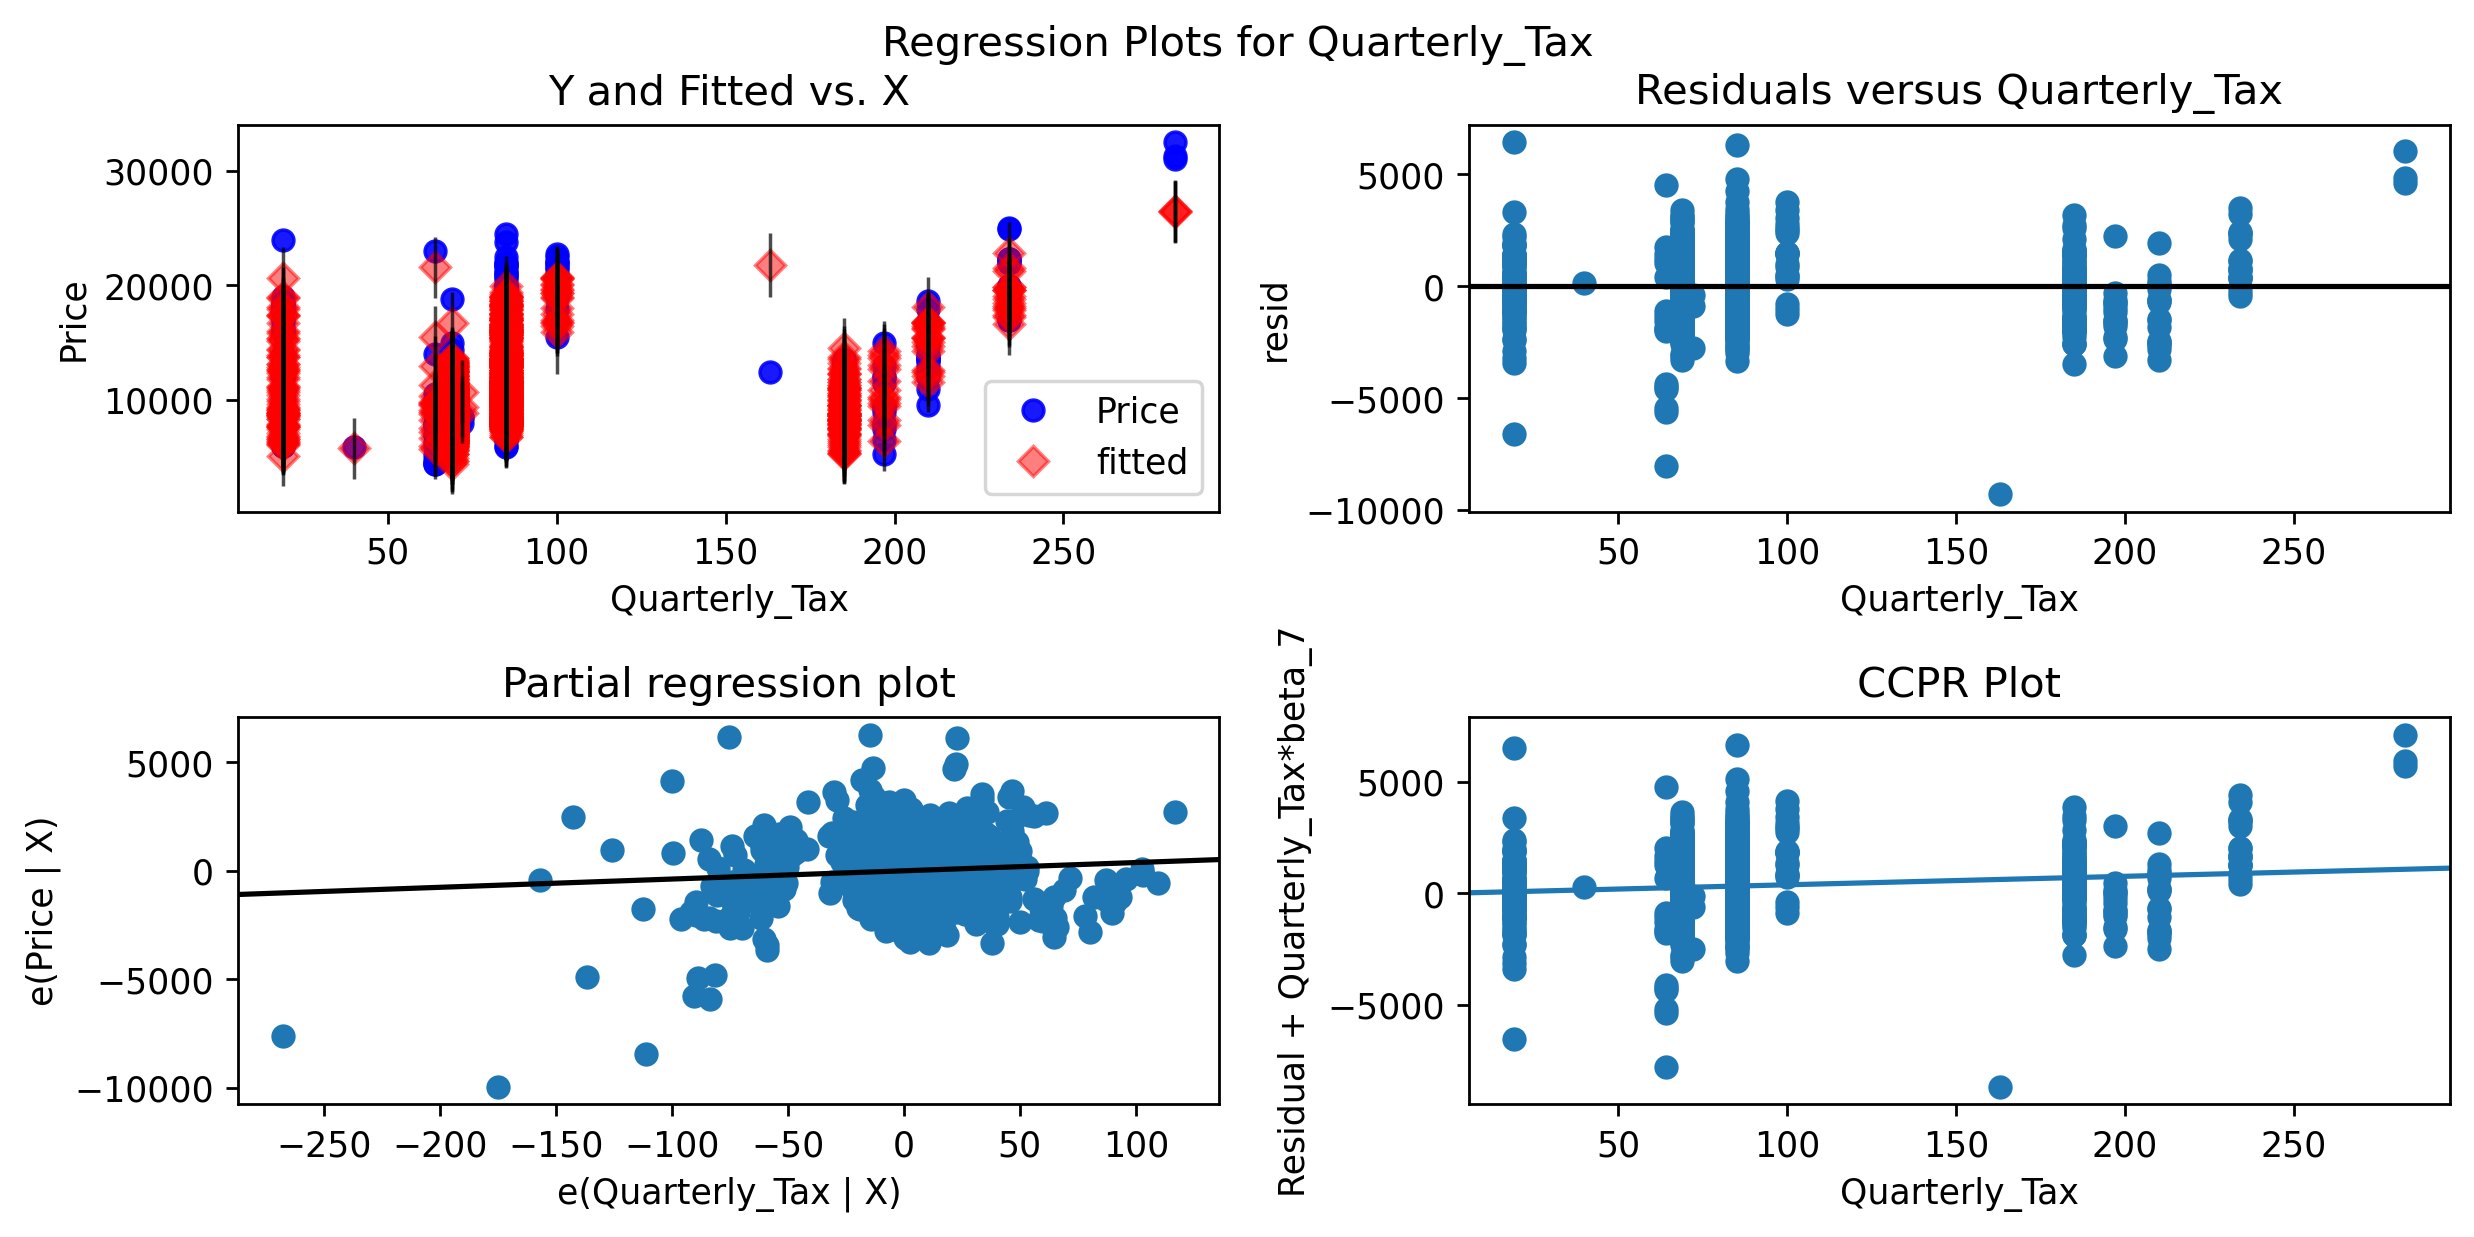

In [113]:
sm.graphics.plot_regress_exog(model,'Quarterly_Tax');

eval_env: 1


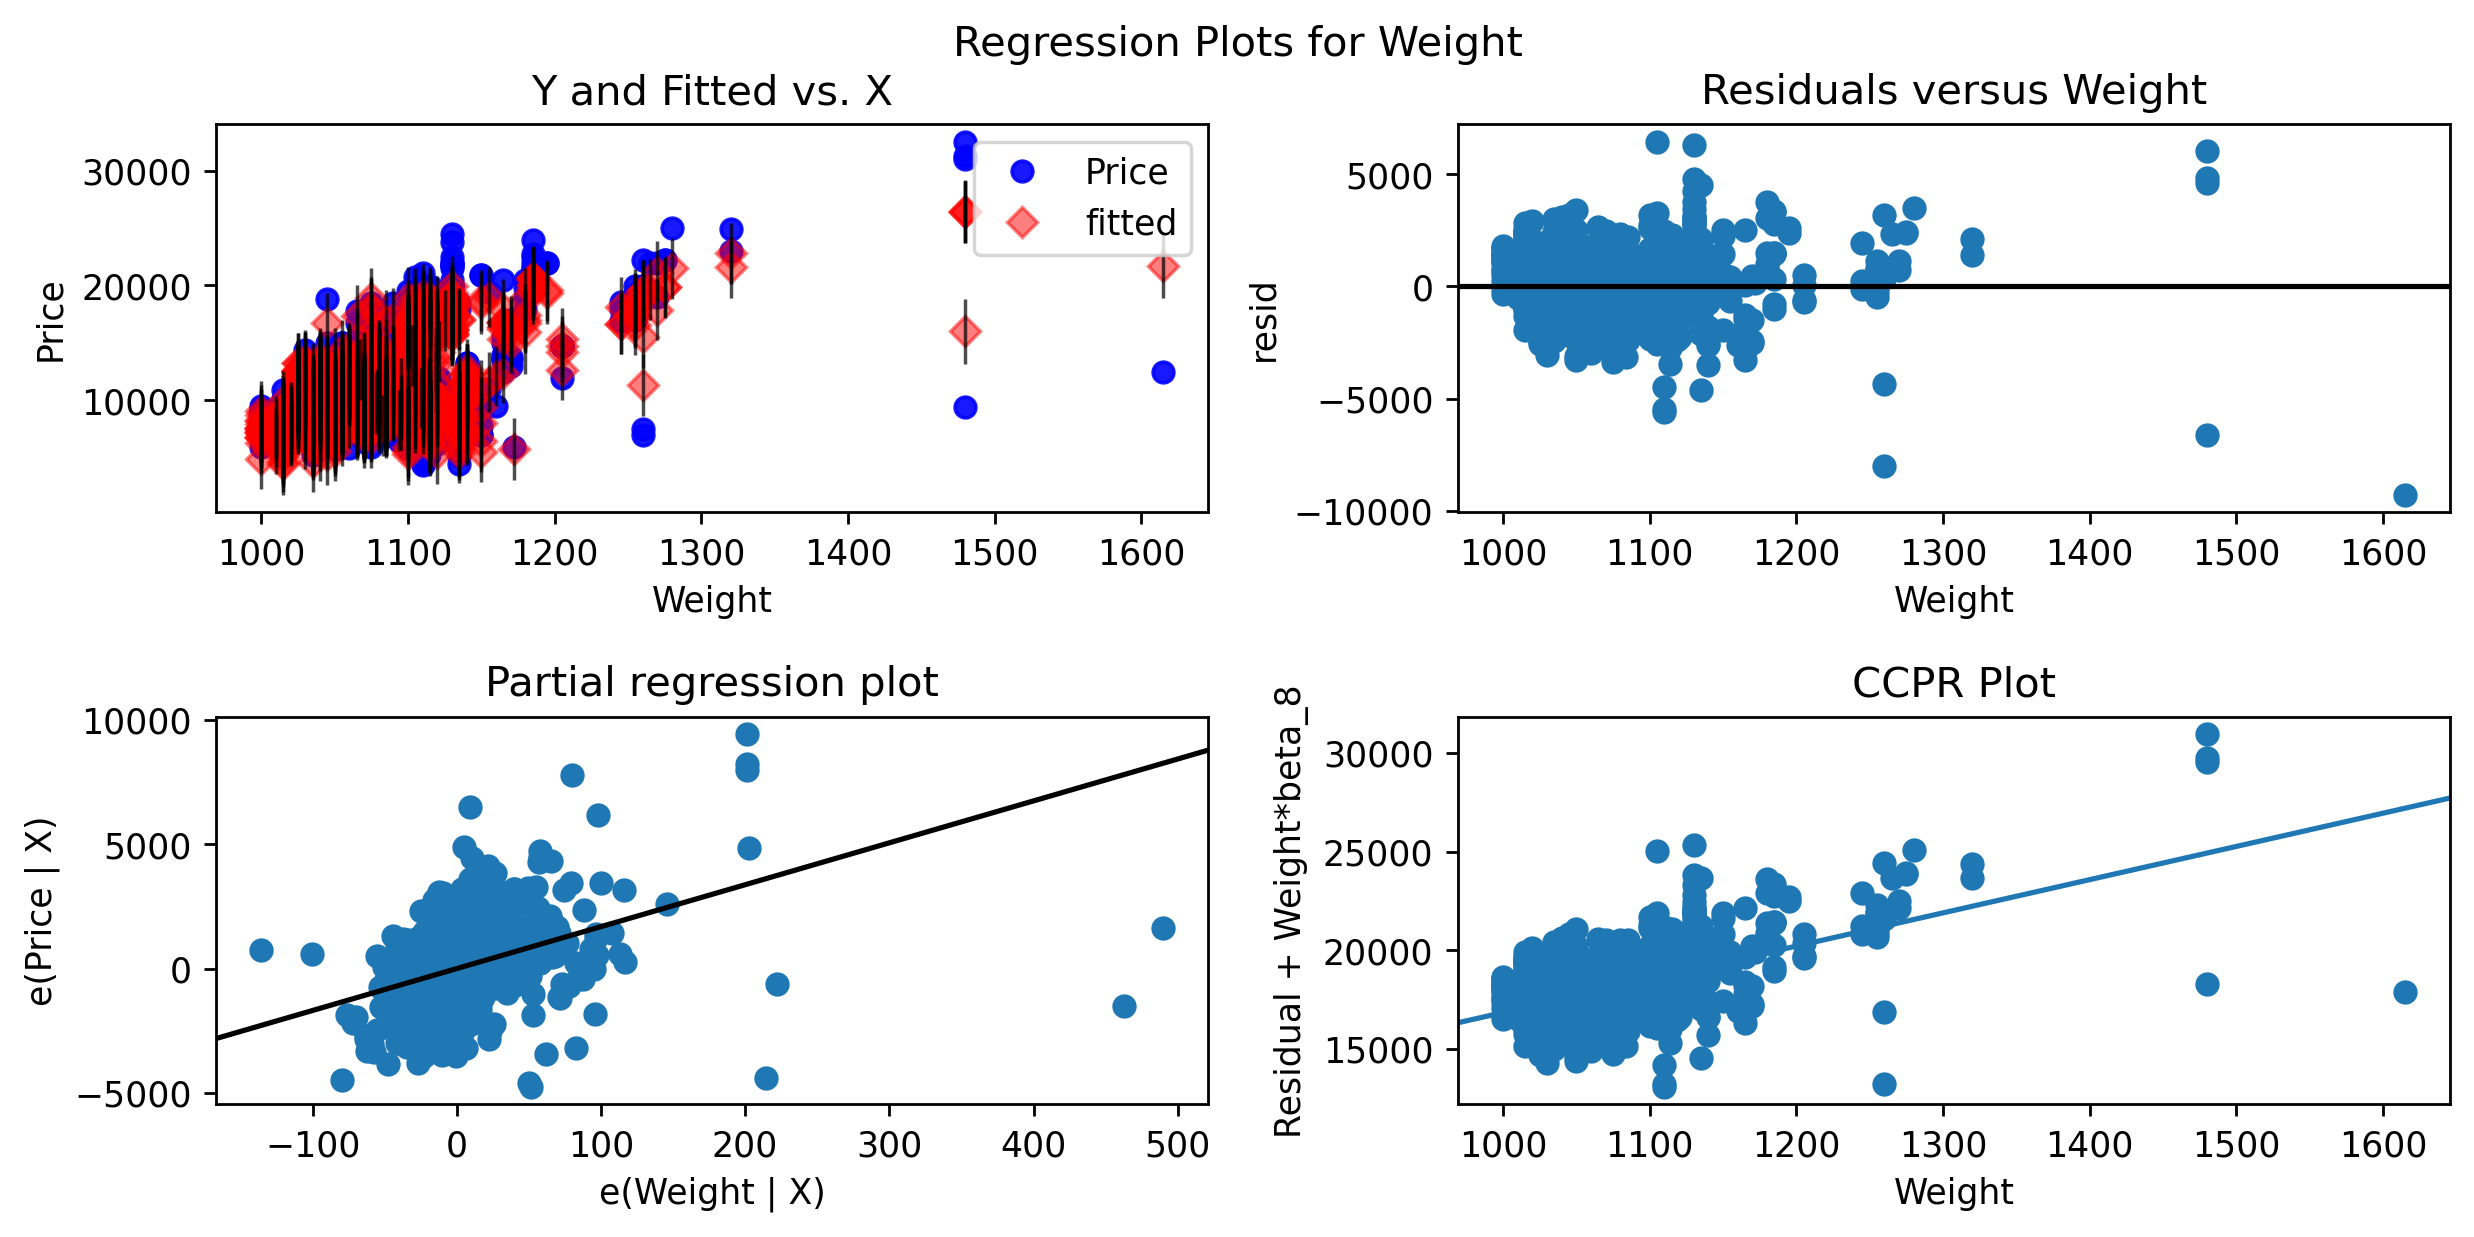

In [114]:
sm.graphics.plot_regress_exog(model,'Weight');

# Model Deletion Diagnostics
## 1) Cook's Distance  
## 2) Leverage value


In [117]:
c,p=model.get_influence().cooks_distance

In [118]:
c

array([7.26026022e-03, 3.95680691e-03, 5.46705946e-03, ...,
       7.95680977e-07, 6.99765671e-04, 1.08353015e-02])

<StemContainer object of 3 artists>

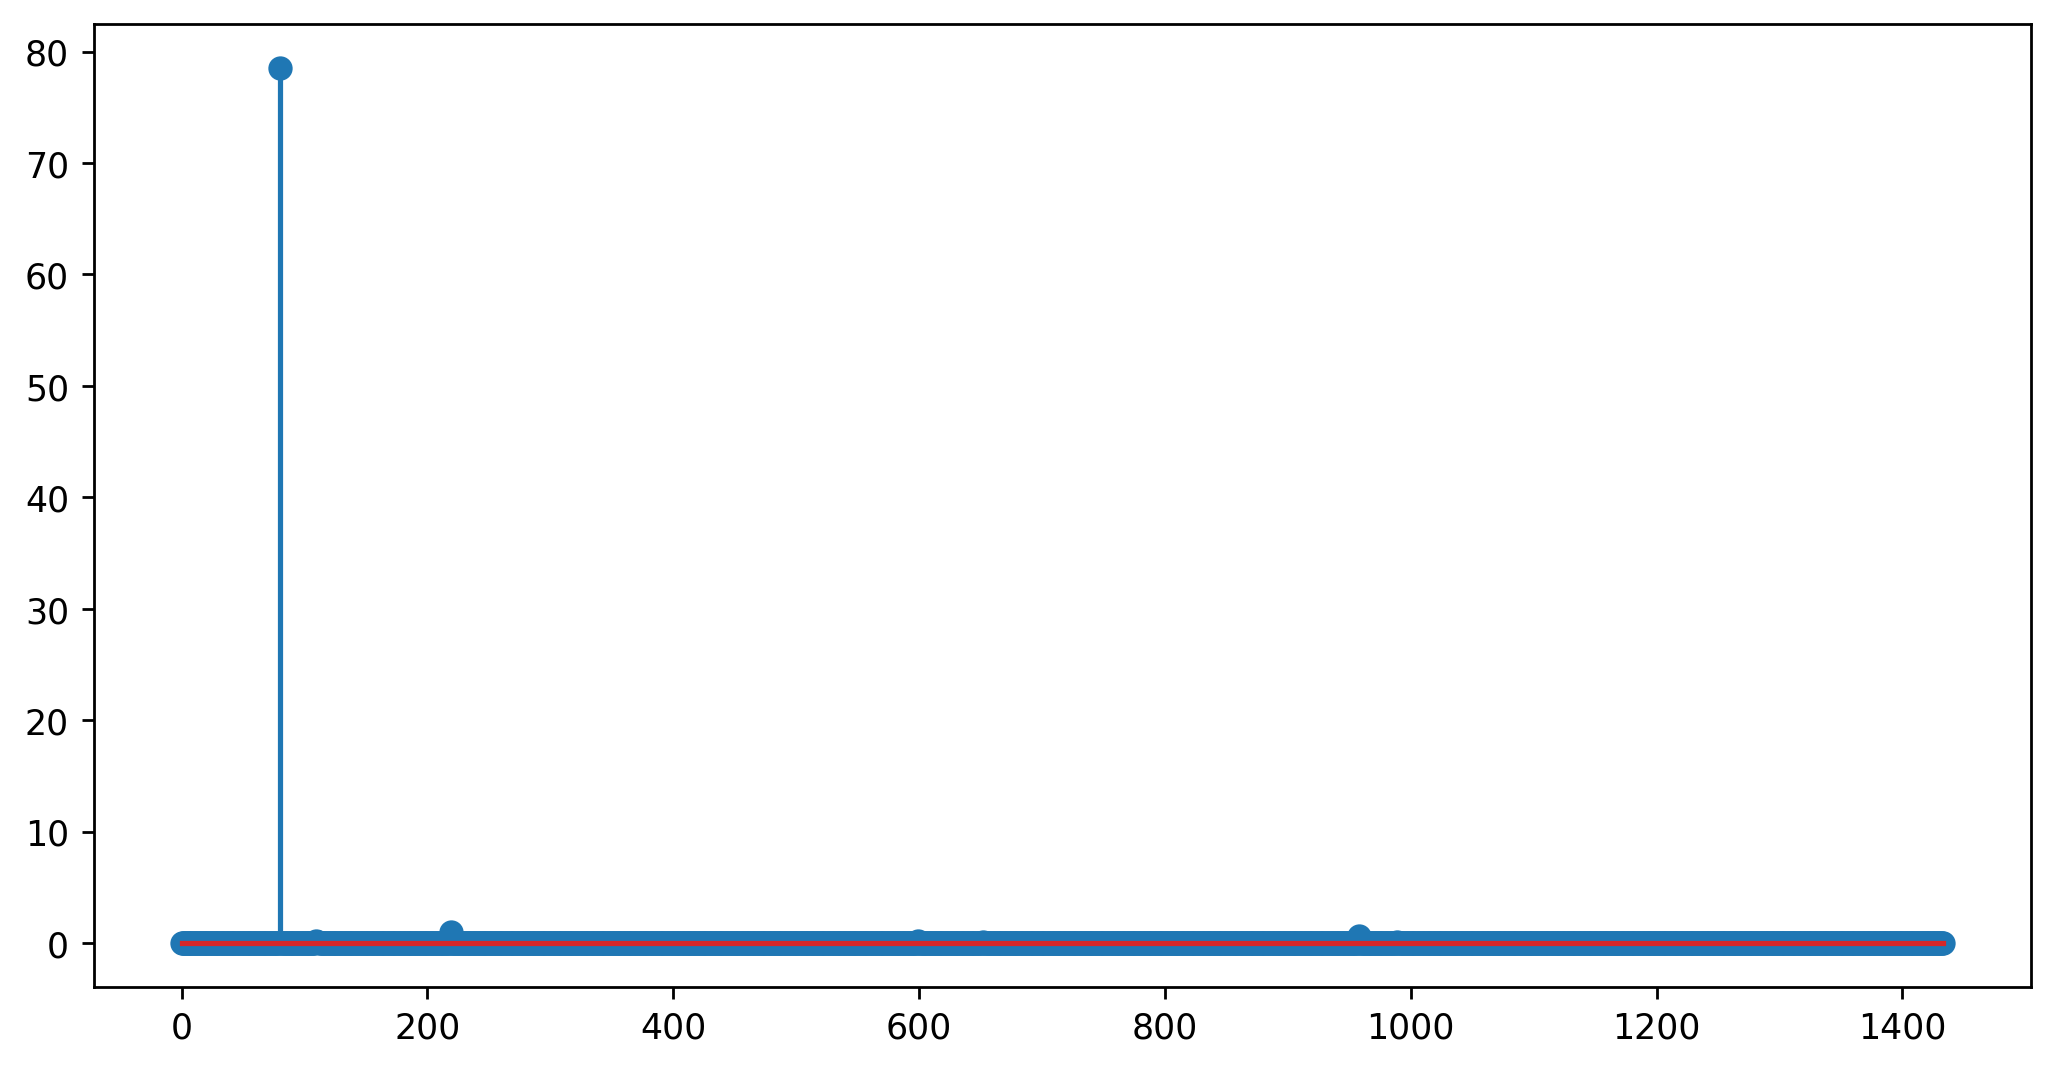

In [120]:
plt.stem(c)

In [121]:
np.argmax(c) , np.max(c)

(80, 78.53641998041046)

In [122]:
## Influences plot
from statsmodels.graphics.regressionplots import influence_plot

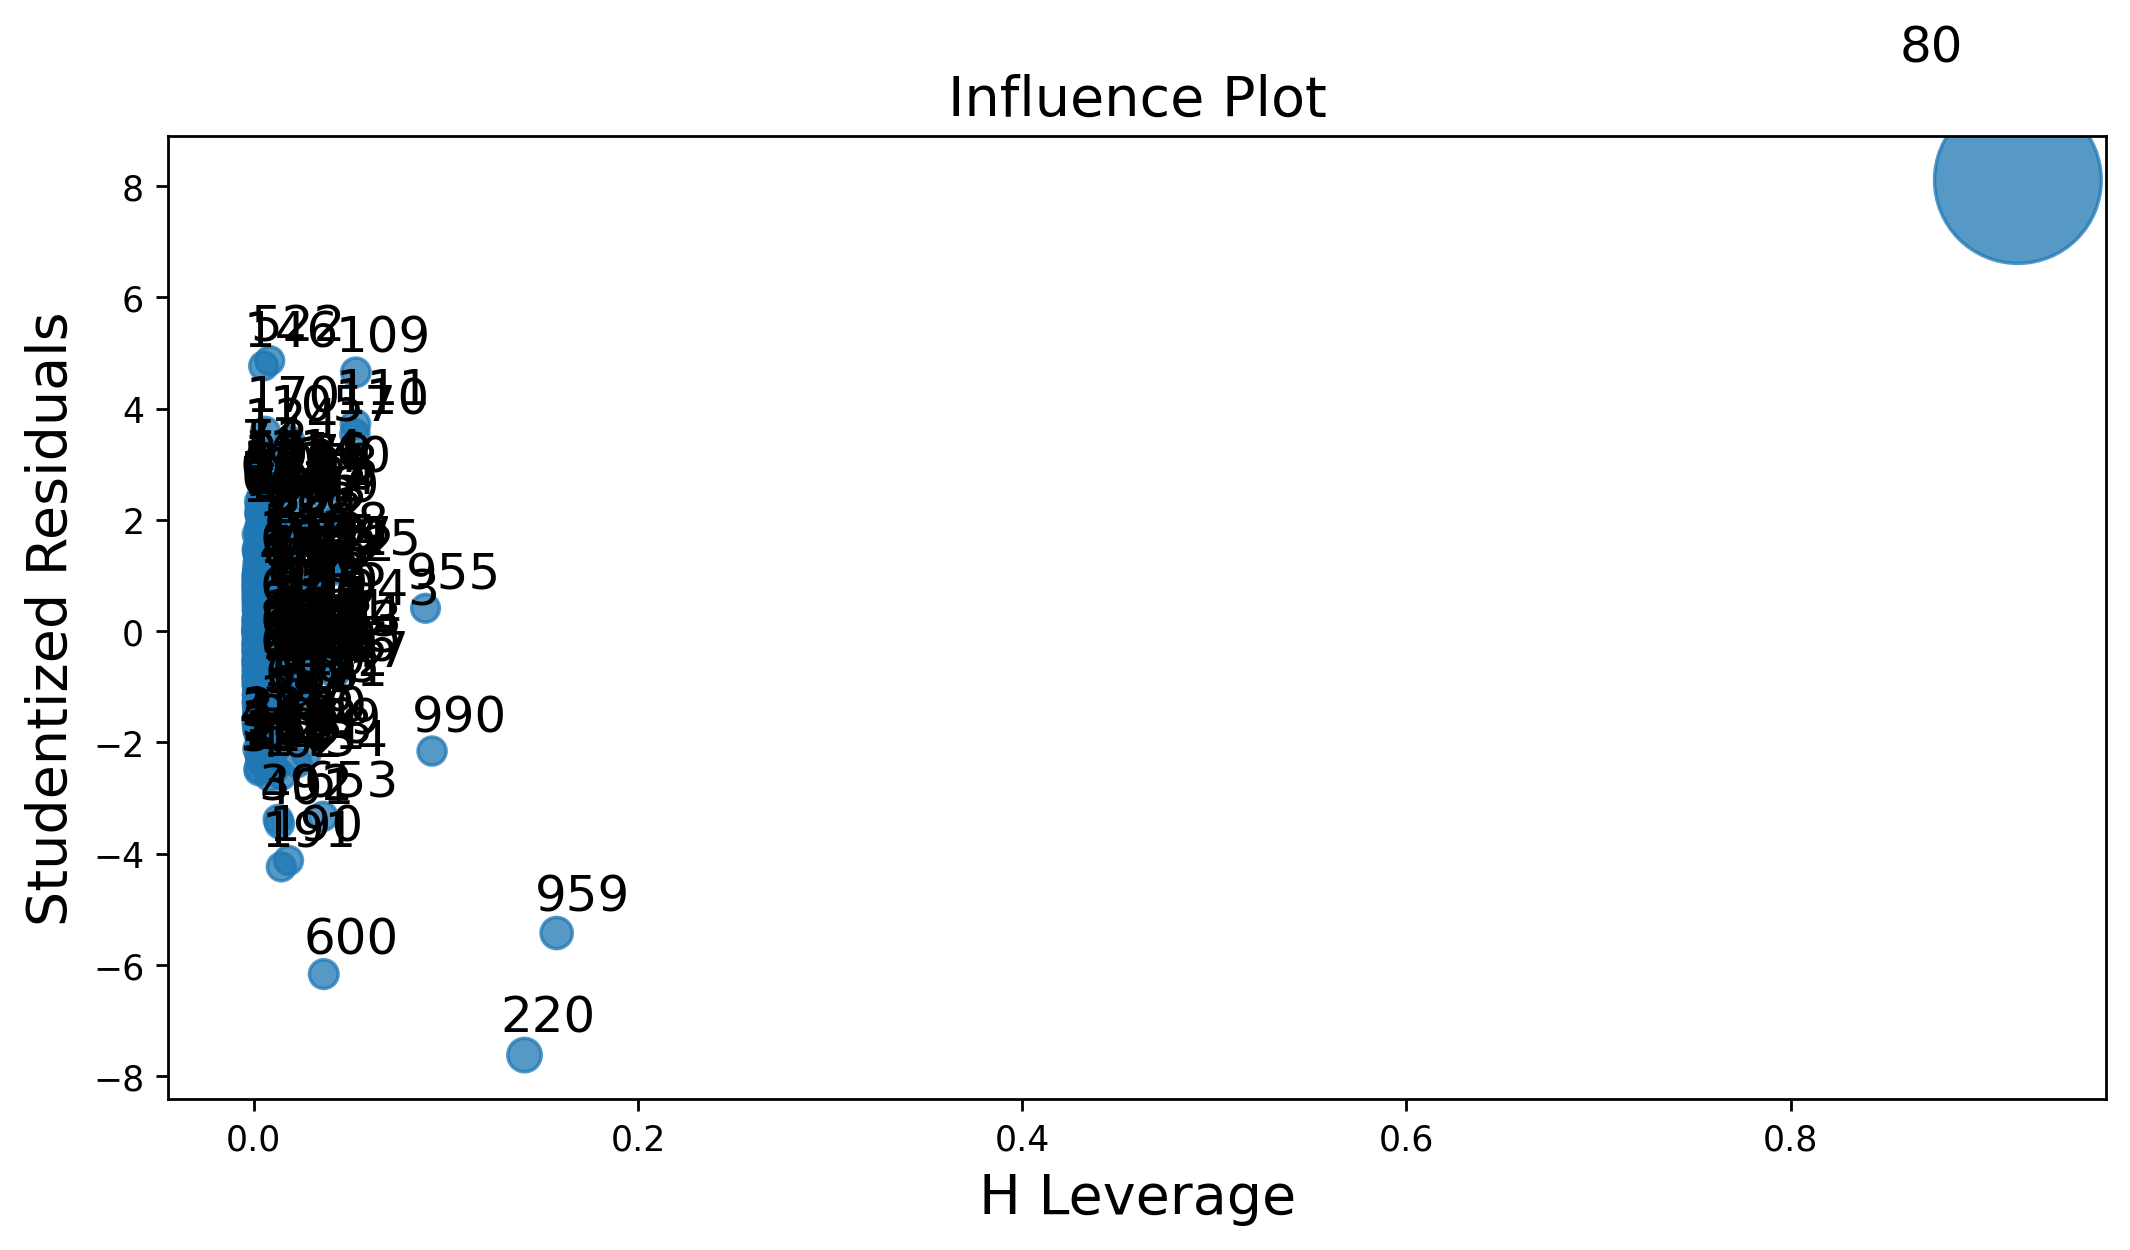

In [124]:
influence_plot(model);

In [125]:
## Calculation of cut off
k=len(df.columns)
n=len(df)
cutoff=3*(k+1)/n

In [126]:
cutoff

0.02092050209205021

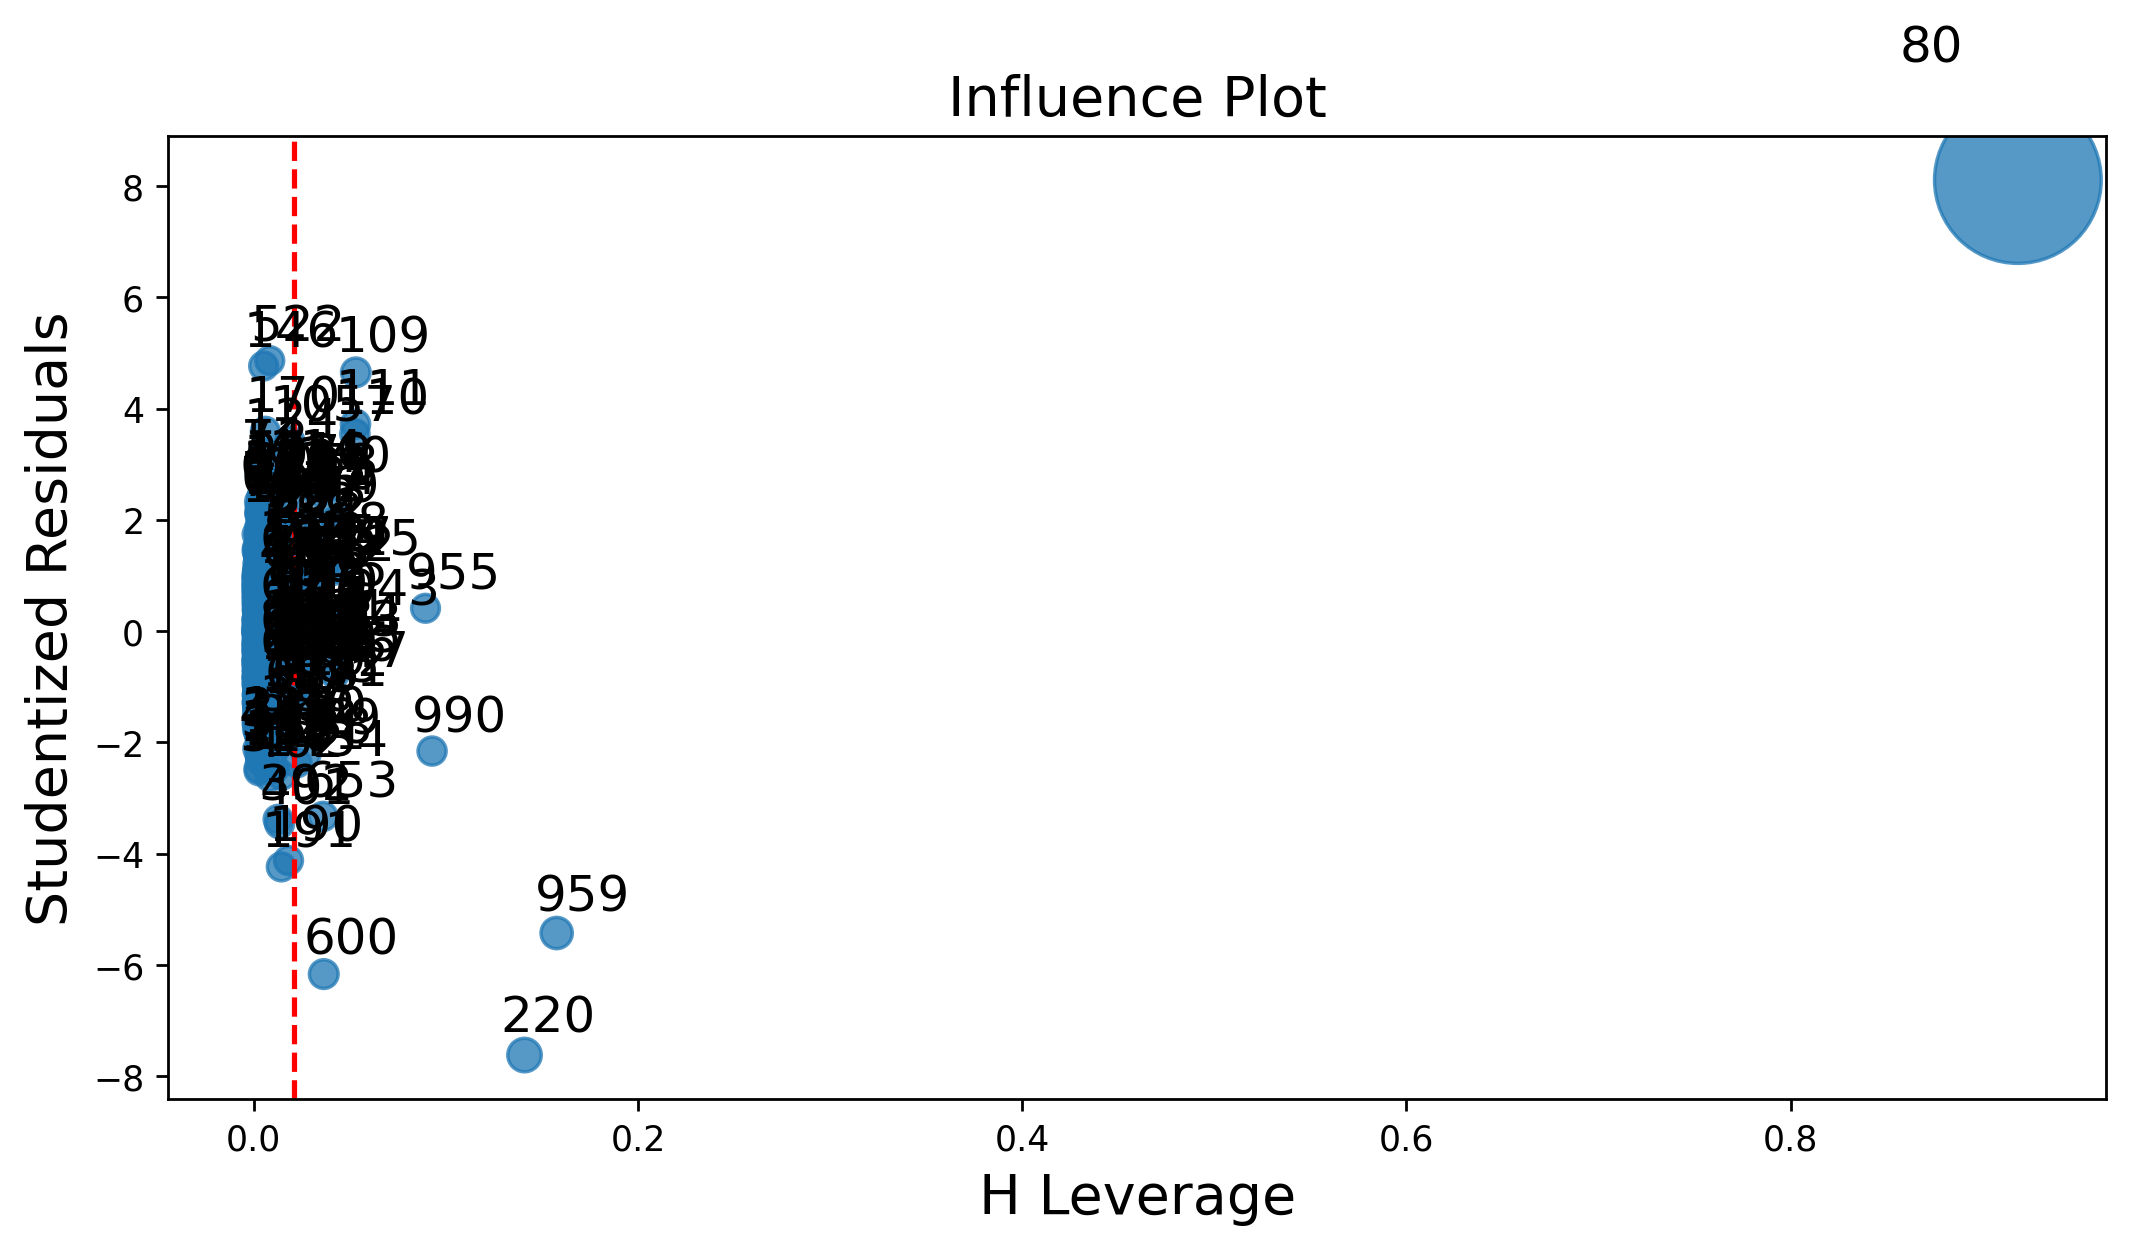

In [127]:
influence_plot(model)
plt.axvline(cutoff,color='red',linestyle='--')

In [128]:
## the points beyond 0.020 are outliers

# Improving the model

In [129]:
df.drop([80],inplace=True)

In [130]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

In [131]:
df.reset_index(inplace=True)

In [132]:
df

index  Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0         0  13500         23  46986   90  2000      3      5            210   
1         1  13750         23  72937   90  2000      3      5            210   
2         2  13950         24  41711   90  2000      3      5            210   
3         3  14950         26  48000   90  2000      3      5            210   
4         4  13750         30  38500   90  2000      3      5            210   
...     ...    ...        ...    ...  ...   ...    ...    ...            ...   
1428   1430   7500         69  20544   86  1300      3      5             69   
1429   1431  10845         72  19000   86  1300      3      5             69   
1430   1432   8500         71  17016   86  1300      3      5             69   
1431   1433   7250         70  16916   86  1300      3      5             69   
1432   1434   6950         76      1  110  1600      5      5             19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1428    1025  
1429    1015  
1430    1015  
1431    1015  
1432    1114  

[1433 rows x 10 columns]

In [ ]:
df.drop(columns=['index'],inplace=True)

In [134]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1428   7500         69  20544   86  1300      3      5             69    1025
1429  10845         72  19000   86  1300      3      5             69    1015
1430   8500         71  17016   86  1300      3      5             69    1015
1431   7250         70  16916   86  1300      3      5             69    1015
1432   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

# Final model

In [139]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [141]:
FR2=model.rsquared

In [142]:
FR2

0.8670634713977597

# Prediction for new data

In [147]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [149]:
newdf=pd.DataFrame({'Age_08_04':[25,30],
                    'KM':[34890,23087],
                    'HP':[80,90],
                    'cc':[2000,2002],
                    'Doors':[3,4],
                    'Gears':[5,6],
                    'Quarterly_Tax':[210,220],
                    'Weight':[1163,1756]})

In [150]:
newdf

Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0         25  34890  80  2000      3      5            210    1163
1         30  23087  90  2002      4      6            220    1756

In [151]:
model.predict(newdf)

0    16050.049263
1    28524.012355
dtype: float64

# Table

In [144]:
table=pd.DataFrame({'Models':["model 1",'final model'],
                    'Rsquared values':[R2,FR2]})

In [145]:
table

Models  Rsquared values
0      model 1         0.861441
1  final model         0.867063